# Step 1

## Import Libraries

In [1]:
%matplotlib inline
import time
import re

#data import libraries
import pandas as pd

#path libraries
from pathlib import Path
import os.path as osp

#math libraries
import math
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm

#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


#sklearn libraries for data cleaning
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.preprocessing import StandardScaler #normalize your dataset
from sklearn.model_selection import train_test_split #split data to train and test data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler #normalize your dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#sklearn library for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import ElasticNetCV


#sklearn libraries for regularized regression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

#sklearn library for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge

#sklearn library for knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor as KNNRegressor

#sklearn libraries for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import plot_tree

#sklearn libraries for data cleaning and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler #normalize your dataset

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest

#sklearn library for naive bayes
from sklearn.naive_bayes import GaussianNB as NB

#sklearn library for support vector machine
from sklearn.svm import SVC

#sklearn library for neural networks
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier

#Bagging Classifier
from sklearn.ensemble import AdaBoostClassifier

#LGBM
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

#catboost classifier
from catboost import CatBoostClassifier, Pool

#xgboost 
from xgboost import XGBClassifier

from matplotlib.ticker import FuncFormatter


#optuna
import optuna

#sklearn library for scores and errors
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import cohen_kappa_score, log_loss
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

#feature selection
from sklearn.feature_selection import RFECV, RFE

#polynomial feature transformation
from sklearn.preprocessing import PolynomialFeatures

#warnings 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## Load the financial ratio dataset

In [2]:
## Read the csv file
financial_ratios_df = pd.read_csv('Financial_Ratios_Data.csv')

# This data file can be merged with the Sector information in Excel (if you wish) or in Python. 
# You can filter the part of the data sample that includes only your Sector focus. That way, you have a smaller data set. 
# You will not need all the stocks, only the ones that are in your selected sectors.

# This example uses the whole list of stocks in the data set. 

# Display the general info about the data set
financial_ratios_df.info()
financial_ratios_df.head()
financial_ratios_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124582 entries, 0 to 124581
Data columns (total 69 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gvkey            124582 non-null  int64  
 1   permno           124582 non-null  int64  
 2   adate            124509 non-null  object 
 3   qdate            124582 non-null  object 
 4   public_date      124582 non-null  object 
 5   CAPEI            123755 non-null  float64
 6   bm               120883 non-null  float64
 7   evm              123888 non-null  float64
 8   pe_op_basic      123504 non-null  float64
 9   pe_op_dil        123490 non-null  float64
 10  pe_exi           123483 non-null  float64
 11  pe_inc           123508 non-null  float64
 12  ps               124486 non-null  float64
 13  pcf              124392 non-null  float64
 14  npm              124486 non-null  float64
 15  opmbd            124486 non-null  float64
 16  opmad            124486 non-null  floa

,gvkey,permno,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,...,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,PEG_trailing
count,124582.000000,124582.000000,123755.000000,120883.000000,123888.000000,123504.000000,123490.000000,123483.000000,123508.000000,124486.000000,...,123239.000000,120189.000000,124276.000000,120742.000000,88721.000000,124530.000000,124453.000000,124392.000000,120883.000000,78568.000000
mean,39867.628421,56936.397449,25.761034,0.521267,9.090707,18.667361,18.979870,18.472566,18.087534,2.700101,...,27.678907,9.892295,3.759991,4.394347,23.059469,0.095557,0.014472,-0.050290,4.233059,2.400472
std,55512.160192,28400.771037,969.951454,0.719455,965.206858,64.844897,66.687653,77.516682,74.616764,5.658183,...,482.266358,13.344242,463.084793,85.541253,606.686558,8.794426,0.032588,0.069799,6.265227,6.960305
min,1075.000000,10078.000000,-125202.000000,0.000000,-189703.000000,-3190.000000,-3190.000000,-3000.000000,-2606.500000,0.011000,...,0.030000,-37.918000,-592.170000,0.000000,-70400.000000,0.000000,0.000000,-1.449000,0.056000,-134.810000
25%,6653.000000,25778.000000,13.631000,0.229000,8.207000,10.839000,11.010000,10.287000,9.962000,0.917000,...,4.978000,4.704000,0.589000,0.956000,3.001000,0.000000,0.000000,-0.074000,1.499000,0.313000
50%,11446.000000,63830.000000,21.786000,0.394000,10.829000,16.731000,16.981000,17.222000,16.927000,1.708000,...,6.987000,7.497000,1.027000,1.682000,5.762000,0.000000,0.000000,-0.042000,2.576000,0.890000
75%,32106.000000,83462.000000,34.008000,0.669000,14.590000,24.272000,24.670000,25.931500,25.656000,3.155750,...,10.182000,11.276000,1.812000,3.179000,12.405000,0.030000,0.014000,-0.017000,4.449000,1.984000
max,260778.000000,93436.000000,109856.000000,137.237000,44533.600000,905.750000,983.333000,964.174000,932.609000,435.692000,...,55383.200000,764.463000,94252.000000,15681.800000,33430.700000,1788.600000,0.404000,0.954000,98.717000,139.414000


## Date Extraction

Create a new variable called pdate, which is changing the public date variable to a datetime type. After, create a new year and month variable from the pdate

In [3]:
# Create the useful date variable, it is not seen as date in it raw form
financial_ratios_df['pdate'] = pd.to_datetime(financial_ratios_df['public_date'])

# Generate year & month variables (may be useful to group the data, not necessary)
financial_ratios_df['year'] = financial_ratios_df['pdate'].dt.year
financial_ratios_df['month'] = financial_ratios_df['pdate'].dt.month

## View the updated financial ratio dataset

In [4]:
financial_ratios_df

,gvkey,permno,adate,qdate,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,...,rd_sale,adv_sale,accrual,ptb,PEG_trailing,TICKER,cusip,pdate,year,month
0,12136,10078,2002-06-30,2002-09-30,2003-01-31,11.925,1.154,48.234,-206.000,-206.000,...,0.145,0.01,-0.075,1.061,NaN,SUNW,86681010,2003-01-31,2003,1
1,12136,10078,2002-06-30,2002-12-31,2003-02-28,16.320,0.732,22.761,-57.333,-57.333,...,0.150,0.01,-0.199,1.511,-0.338,SUNW,86681010,2003-02-28,2003,2
2,12136,10078,2002-06-30,2002-12-31,2003-03-31,15.635,0.732,22.761,-54.333,-54.333,...,0.150,0.01,-0.199,1.448,-0.320,SUNW,86681010,2003-03-31,2003,3
3,12136,10078,2002-06-30,2002-12-31,2003-04-30,15.874,0.732,22.761,-55.167,-55.167,...,0.150,0.01,-0.199,1.470,-0.325,SUNW,86681010,2003-04-30,2003,4
4,12136,10078,2002-06-30,2003-03-31,2003-05-31,26.985,0.699,16.357,-75.652,-75.652,...,0.153,0.01,-0.212,1.909,-2.286,SUNW,86681010,2003-05-31,2003,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124577,184996,93436,2021-12-31,2022-06-30,2022-08-31,1003.520,0.052,65.132,29.414,32.889,...,0.043,0.00,-0.074,23.727,0.545,TSLA,88160R10,2022-08-31,2022,8
124578,184996,93436,2021-12-31,2022-06-30,2022-09-30,973.363,0.052,65.132,28.308,31.653,...,0.043,0.00,-0.074,23.014,0.525,TSLA,88160R10,2022-09-30,2022,9
124579,184996,93436,2021-12-31,2022-06-30,2022-10-31,834.917,0.052,65.132,24.284,27.153,...,0.043,0.00,-0.074,19.741,0.450,TSLA,88160R10,2022-10-31,2022,10
124580,184996,93436,2021-12-31,2022-09-30,2022-11-30,412.502,0.048,58.592,53.834,59.969,...,0.040,0.00,-0.074,15.420,0.456,TSLA,88160R10,2022-11-30,2022,11


## Looking at the columns and viewing the number of non-null rows in each column

In [5]:
financial_ratios_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124582 entries, 0 to 124581
Data columns (total 72 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gvkey            124582 non-null  int64         
 1   permno           124582 non-null  int64         
 2   adate            124509 non-null  object        
 3   qdate            124582 non-null  object        
 4   public_date      124582 non-null  object        
 5   CAPEI            123755 non-null  float64       
 6   bm               120883 non-null  float64       
 7   evm              123888 non-null  float64       
 8   pe_op_basic      123504 non-null  float64       
 9   pe_op_dil        123490 non-null  float64       
 10  pe_exi           123483 non-null  float64       
 11  pe_inc           123508 non-null  float64       
 12  ps               124486 non-null  float64       
 13  pcf              124392 non-null  float64       
 14  npm              124

## Run EDA functions

## Check for any duplicate rows

In [6]:
duplicates = financial_ratios_df[financial_ratios_df.duplicated()]

print("Duplicated Rows:")
print(duplicates)

Duplicated Rows:
Empty DataFrame
Columns: [gvkey, permno, adate, qdate, public_date, CAPEI, bm, evm, pe_op_basic, pe_op_dil, pe_exi, pe_inc, ps, pcf, npm, opmbd, opmad, gpm, ptpm, cfm, roa, roe, roce, aftret_eq, pretret_noa, pretret_earnat, GProf, equity_invcap, debt_invcap, totdebt_invcap, capital_ratio, int_debt, int_totdebt, cash_lt, invt_act, rect_act, debt_at, debt_ebitda, curr_debt, lt_debt, profit_lct, ocf_lct, cash_debt, fcf_ocf, lt_ppent, dltt_be, debt_assets, debt_capital, de_ratio, intcov, intcov_ratio, cash_ratio, quick_ratio, curr_ratio, cash_conversion, inv_turn, at_turn, rect_turn, pay_turn, sale_invcap, sale_equity, sale_nwc, rd_sale, adv_sale, accrual, ptb, PEG_trailing, TICKER, cusip, pdate, year, month]
Index: []

[0 rows x 72 columns]


## Check for any outliers

In [7]:
# Check the outliers (create percentiles and delete/remove the extreme values)
from scipy.stats import zscore


# These financial ratios are commonly used to evaluate different aspects of a company's financial performance  valuation, and risk. 
#
# The detection of outliers in these ratios can help identify potential anomalies or irregularities in financial data that may require further investigation.
financial_ratio = financial_ratios_df.copy()
financial_ratio = financial_ratio.drop(columns=['gvkey', 'permno', 'CAPEI', 'PEG_trailing', 'pdate', 'year', 'month'])
financial_ratio = financial_ratio.select_dtypes(exclude=['object', 'datetime64[ns]'])
financial_ratio

# Create an empty DataFrame to store information about outliers
def detect_outliers_zscore(column, threshold=2):
    z_scores = zscore(column)
    return abs(z_scores) > threshold

# Apply the function to each column
outliers = financial_ratio.apply(detect_outliers_zscore)

# Display the DataFrame with outliers marked
financial_ratio[outliers]

,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,npm,opmbd,...,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
financial_ratio[outliers].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124582 entries, 0 to 124581
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bm               0 non-null      float64
 1   evm              0 non-null      float64
 2   pe_op_basic      0 non-null      float64
 3   pe_op_dil        0 non-null      float64
 4   pe_exi           0 non-null      float64
 5   pe_inc           0 non-null      float64
 6   ps               0 non-null      float64
 7   pcf              0 non-null      float64
 8   npm              0 non-null      float64
 9   opmbd            0 non-null      float64
 10  opmad            0 non-null      float64
 11  gpm              0 non-null      float64
 12  ptpm             0 non-null      float64
 13  cfm              0 non-null      float64
 14  roa              0 non-null      float64
 15  roe              0 non-null      float64
 16  roce             0 non-null      float64
 17  aftret_eq 

No outliers were detected

## Creating a correlation matrix

In [9]:
# Check the correlation matrix and see if there are extremely correlated variables
non_usecol_list = ['gvkey', 'permno', 'adate', 'qdate', 'public_date', 'TICKER', 'cusip', 'year', 'month']
numeric_financial_ratios_df = financial_ratios_df.drop(columns=non_usecol_list, axis=1)
financial_ratios_df_copy = numeric_financial_ratios_df.select_dtypes(exclude=['object', 'datetime64[ns]'])


def my_function(x):
    return list(dict.fromkeys(x))

columns_to_correlate = financial_ratios_df_copy[financial_ratios_df_copy.columns]


# Calculate the correlation matrix
correlation_matrix = columns_to_correlate.corr()


highly_correlated_variables = []
threshold = 0.95
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_variables.append(colname)

highly_correlated_variables = my_function(highly_correlated_variables)
if len(highly_correlated_variables) > 0:
    print("\nExtremely Correlated Variables:")
    print(highly_correlated_variables)
else:
    print("\nNo highly correlated variables found.")



Extremely Correlated Variables:
['pe_op_dil', 'opmad', 'ptpm', 'cfm', 'debt_invcap', 'totdebt_invcap', 'debt_ebitda', 'quick_ratio', 'sale_invcap', 'sale_equity']


## Dropping rows that fall below the correlation threshold

In [10]:
# Check the number of observation per each Feature (=Financial Ratio) per each Year/Month -- remove the ones that show a substantial number of missing obs
# Calculate the number of observations per each financial ratio per each year/month
observations_per_ratio = financial_ratios_df.groupby(['year', 'month']).count().reset_index()


threshold = 0.05 

# Identify financial ratios with a substantial number of missing observations
ratios_to_remove = observations_per_ratio[observations_per_ratio < len(financial_ratios_df) * threshold]
ratios_to_remove = ratios_to_remove.dropna(how='all').set_index(['year', 'month']).index
df_cleaned = financial_ratios_df[~financial_ratios_df.set_index(['year', 'month']).index.isin(ratios_to_remove)]

print("Cleaned DataFrame:")
print(df_cleaned)

Cleaned DataFrame:
Empty DataFrame
Columns: [gvkey, permno, adate, qdate, public_date, CAPEI, bm, evm, pe_op_basic, pe_op_dil, pe_exi, pe_inc, ps, pcf, npm, opmbd, opmad, gpm, ptpm, cfm, roa, roe, roce, aftret_eq, pretret_noa, pretret_earnat, GProf, equity_invcap, debt_invcap, totdebt_invcap, capital_ratio, int_debt, int_totdebt, cash_lt, invt_act, rect_act, debt_at, debt_ebitda, curr_debt, lt_debt, profit_lct, ocf_lct, cash_debt, fcf_ocf, lt_ppent, dltt_be, debt_assets, debt_capital, de_ratio, intcov, intcov_ratio, cash_ratio, quick_ratio, curr_ratio, cash_conversion, inv_turn, at_turn, rect_turn, pay_turn, sale_invcap, sale_equity, sale_nwc, rd_sale, adv_sale, accrual, ptb, PEG_trailing, TICKER, cusip, pdate, year, month]
Index: []

[0 rows x 72 columns]


## Reassigning the financial ratio dataset to the dataset where rows were dropped after checking its correlation

In [11]:
financial_ratios_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124582 entries, 0 to 124581
Data columns (total 72 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gvkey            124582 non-null  int64         
 1   permno           124582 non-null  int64         
 2   adate            124509 non-null  object        
 3   qdate            124582 non-null  object        
 4   public_date      124582 non-null  object        
 5   CAPEI            123755 non-null  float64       
 6   bm               120883 non-null  float64       
 7   evm              123888 non-null  float64       
 8   pe_op_basic      123504 non-null  float64       
 9   pe_op_dil        123490 non-null  float64       
 10  pe_exi           123483 non-null  float64       
 11  pe_inc           123508 non-null  float64       
 12  ps               124486 non-null  float64       
 13  pcf              124392 non-null  float64       
 14  npm              124

## Dropping columns where there are above 200 missing values after grouping by the year and month column

In [12]:
financial_ratios_null_counts = financial_ratios_df.groupby(['year', 'month']).apply(lambda x: x.isnull().sum())

# Set the threshold for null values
threshold = 200  # Adjust this threshold according to your requirement

# Identify columns to drop based on the threshold
columns_to_drop = financial_ratios_null_counts.columns[financial_ratios_null_counts.gt(threshold).any()]

# Drop columns from the original DataFrame
financial_ratios_df = financial_ratios_df.drop(columns=columns_to_drop)

# Display the result
print(f"Columns Dropped: {columns_to_drop.to_list()}")
financial_ratios_df

Columns Dropped: ['PEG_trailing']


,gvkey,permno,adate,qdate,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,...,sale_nwc,rd_sale,adv_sale,accrual,ptb,TICKER,cusip,pdate,year,month
0,12136,10078,2002-06-30,2002-09-30,2003-01-31,11.925,1.154,48.234,-206.000,-206.000,...,4.709,0.145,0.01,-0.075,1.061,SUNW,86681010,2003-01-31,2003,1
1,12136,10078,2002-06-30,2002-12-31,2003-02-28,16.320,0.732,22.761,-57.333,-57.333,...,4.580,0.150,0.01,-0.199,1.511,SUNW,86681010,2003-02-28,2003,2
2,12136,10078,2002-06-30,2002-12-31,2003-03-31,15.635,0.732,22.761,-54.333,-54.333,...,4.580,0.150,0.01,-0.199,1.448,SUNW,86681010,2003-03-31,2003,3
3,12136,10078,2002-06-30,2002-12-31,2003-04-30,15.874,0.732,22.761,-55.167,-55.167,...,4.580,0.150,0.01,-0.199,1.470,SUNW,86681010,2003-04-30,2003,4
4,12136,10078,2002-06-30,2003-03-31,2003-05-31,26.985,0.699,16.357,-75.652,-75.652,...,4.680,0.153,0.01,-0.212,1.909,SUNW,86681010,2003-05-31,2003,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124577,184996,93436,2021-12-31,2022-06-30,2022-08-31,1003.520,0.052,65.132,29.414,32.889,...,8.572,0.043,0.00,-0.074,23.727,TSLA,88160R10,2022-08-31,2022,8
124578,184996,93436,2021-12-31,2022-06-30,2022-09-30,973.363,0.052,65.132,28.308,31.653,...,8.572,0.043,0.00,-0.074,23.014,TSLA,88160R10,2022-09-30,2022,9
124579,184996,93436,2021-12-31,2022-06-30,2022-10-31,834.917,0.052,65.132,24.284,27.153,...,8.572,0.043,0.00,-0.074,19.741,TSLA,88160R10,2022-10-31,2022,10
124580,184996,93436,2021-12-31,2022-09-30,2022-11-30,412.502,0.048,58.592,53.834,59.969,...,8.372,0.040,0.00,-0.074,15.420,TSLA,88160R10,2022-11-30,2022,11


## Filling missing CAPEI with 0

In [13]:
financial_ratios_df[['CAPEI']] = financial_ratios_df[['CAPEI']].fillna(0)

## Creating a dataframe of the numerical features from the financial ratio dataset

In [14]:
financial_ratio = financial_ratios_df.copy()
financial_ratio = financial_ratio.drop(columns=['gvkey', 'permno', 'CAPEI',
                                                'pdate', 'year', 'month'])
financial_ratio = financial_ratio.select_dtypes(exclude=['object', 'datetime64[ns]'])
financial_ratio

,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,npm,opmbd,...,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb
0,1.154,48.234,-206.000,-206.000,-77.250,-77.250,0.797,13.542,-0.042,0.041,...,0.751,4.967,6.596,1.150,1.278,4.709,0.145,0.01,-0.075,1.061
1,0.732,22.761,-57.333,-57.333,-18.595,-18.595,0.902,13.947,-0.194,0.062,...,0.783,4.881,6.559,1.162,1.350,4.580,0.150,0.01,-0.199,1.511
2,0.732,22.761,-54.333,-54.333,-17.622,-17.622,0.864,13.361,-0.194,0.062,...,0.783,4.881,6.559,1.162,1.350,4.580,0.150,0.01,-0.199,1.448
3,0.732,22.761,-55.167,-55.167,-17.892,-17.892,0.877,13.566,-0.194,0.062,...,0.783,4.881,6.559,1.162,1.350,4.580,0.150,0.01,-0.199,1.470
4,0.699,16.357,-75.652,-75.652,-23.836,-23.836,1.183,15.983,-0.196,0.066,...,0.806,4.808,6.500,1.196,1.407,4.680,0.153,0.01,-0.212,1.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124577,0.052,65.132,29.414,32.889,33.166,33.166,12.858,61.345,0.142,0.213,...,1.056,31.063,4.813,1.702,2.104,8.572,0.043,0.00,-0.074,23.727
124578,0.052,65.132,28.308,31.653,31.919,31.919,12.471,59.501,0.142,0.213,...,1.056,31.063,4.813,1.702,2.104,8.572,0.043,0.00,-0.074,23.014
124579,0.052,65.132,24.284,27.153,27.381,27.381,10.698,51.038,0.142,0.213,...,1.056,31.063,4.813,1.702,2.104,8.572,0.043,0.00,-0.074,19.741
124580,0.048,58.592,53.834,59.969,60.217,60.217,8.213,38.352,0.149,0.215,...,1.105,33.302,4.877,1.800,2.131,8.372,0.040,0.00,-0.074,15.420


## Filling missing numbers using the 3 nearest neighbouring points 

In [15]:
imputer = KNNImputer(n_neighbors=3)
financial_ratio_imputed = imputer.fit_transform(financial_ratio)
financial_ratio_imputed = pd.DataFrame(financial_ratio_imputed)
financial_ratio_imputed

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.154,48.234,-206.000,-206.000,-77.250,-77.250,0.797,13.542,-0.042,0.041,...,0.751,4.967,6.596,1.150,1.278,4.709,0.145,0.01,-0.075,1.061
1,0.732,22.761,-57.333,-57.333,-18.595,-18.595,0.902,13.947,-0.194,0.062,...,0.783,4.881,6.559,1.162,1.350,4.580,0.150,0.01,-0.199,1.511
2,0.732,22.761,-54.333,-54.333,-17.622,-17.622,0.864,13.361,-0.194,0.062,...,0.783,4.881,6.559,1.162,1.350,4.580,0.150,0.01,-0.199,1.448
3,0.732,22.761,-55.167,-55.167,-17.892,-17.892,0.877,13.566,-0.194,0.062,...,0.783,4.881,6.559,1.162,1.350,4.580,0.150,0.01,-0.199,1.470
4,0.699,16.357,-75.652,-75.652,-23.836,-23.836,1.183,15.983,-0.196,0.066,...,0.806,4.808,6.500,1.196,1.407,4.680,0.153,0.01,-0.212,1.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124577,0.052,65.132,29.414,32.889,33.166,33.166,12.858,61.345,0.142,0.213,...,1.056,31.063,4.813,1.702,2.104,8.572,0.043,0.00,-0.074,23.727
124578,0.052,65.132,28.308,31.653,31.919,31.919,12.471,59.501,0.142,0.213,...,1.056,31.063,4.813,1.702,2.104,8.572,0.043,0.00,-0.074,23.014
124579,0.052,65.132,24.284,27.153,27.381,27.381,10.698,51.038,0.142,0.213,...,1.056,31.063,4.813,1.702,2.104,8.572,0.043,0.00,-0.074,19.741
124580,0.048,58.592,53.834,59.969,60.217,60.217,8.213,38.352,0.149,0.215,...,1.105,33.302,4.877,1.800,2.131,8.372,0.040,0.00,-0.074,15.420


## Adding the column names back to the filled in dataset

In [16]:
financial_ratio_imputed.columns = financial_ratio.columns
financial_ratio_imputed

,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,npm,opmbd,...,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb
0,1.154,48.234,-206.000,-206.000,-77.250,-77.250,0.797,13.542,-0.042,0.041,...,0.751,4.967,6.596,1.150,1.278,4.709,0.145,0.01,-0.075,1.061
1,0.732,22.761,-57.333,-57.333,-18.595,-18.595,0.902,13.947,-0.194,0.062,...,0.783,4.881,6.559,1.162,1.350,4.580,0.150,0.01,-0.199,1.511
2,0.732,22.761,-54.333,-54.333,-17.622,-17.622,0.864,13.361,-0.194,0.062,...,0.783,4.881,6.559,1.162,1.350,4.580,0.150,0.01,-0.199,1.448
3,0.732,22.761,-55.167,-55.167,-17.892,-17.892,0.877,13.566,-0.194,0.062,...,0.783,4.881,6.559,1.162,1.350,4.580,0.150,0.01,-0.199,1.470
4,0.699,16.357,-75.652,-75.652,-23.836,-23.836,1.183,15.983,-0.196,0.066,...,0.806,4.808,6.500,1.196,1.407,4.680,0.153,0.01,-0.212,1.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124577,0.052,65.132,29.414,32.889,33.166,33.166,12.858,61.345,0.142,0.213,...,1.056,31.063,4.813,1.702,2.104,8.572,0.043,0.00,-0.074,23.727
124578,0.052,65.132,28.308,31.653,31.919,31.919,12.471,59.501,0.142,0.213,...,1.056,31.063,4.813,1.702,2.104,8.572,0.043,0.00,-0.074,23.014
124579,0.052,65.132,24.284,27.153,27.381,27.381,10.698,51.038,0.142,0.213,...,1.056,31.063,4.813,1.702,2.104,8.572,0.043,0.00,-0.074,19.741
124580,0.048,58.592,53.834,59.969,60.217,60.217,8.213,38.352,0.149,0.215,...,1.105,33.302,4.877,1.800,2.131,8.372,0.040,0.00,-0.074,15.420


## Adding back the original columns to the imputed dataset

In [17]:
financial_ratio_imputed['gvkey'] = financial_ratios_df['gvkey']
financial_ratio_imputed['permno'] = financial_ratios_df['permno']
financial_ratio_imputed['CAPEI'] = financial_ratios_df['CAPEI']
financial_ratio_imputed['year'] = financial_ratios_df['year']
financial_ratio_imputed['month'] = financial_ratios_df['month']
financial_ratio_imputed

,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,npm,opmbd,...,sale_nwc,rd_sale,adv_sale,accrual,ptb,gvkey,permno,CAPEI,year,month
0,1.154,48.234,-206.000,-206.000,-77.250,-77.250,0.797,13.542,-0.042,0.041,...,4.709,0.145,0.01,-0.075,1.061,12136,10078,11.925,2003,1
1,0.732,22.761,-57.333,-57.333,-18.595,-18.595,0.902,13.947,-0.194,0.062,...,4.580,0.150,0.01,-0.199,1.511,12136,10078,16.320,2003,2
2,0.732,22.761,-54.333,-54.333,-17.622,-17.622,0.864,13.361,-0.194,0.062,...,4.580,0.150,0.01,-0.199,1.448,12136,10078,15.635,2003,3
3,0.732,22.761,-55.167,-55.167,-17.892,-17.892,0.877,13.566,-0.194,0.062,...,4.580,0.150,0.01,-0.199,1.470,12136,10078,15.874,2003,4
4,0.699,16.357,-75.652,-75.652,-23.836,-23.836,1.183,15.983,-0.196,0.066,...,4.680,0.153,0.01,-0.212,1.909,12136,10078,26.985,2003,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124577,0.052,65.132,29.414,32.889,33.166,33.166,12.858,61.345,0.142,0.213,...,8.572,0.043,0.00,-0.074,23.727,184996,93436,1003.520,2022,8
124578,0.052,65.132,28.308,31.653,31.919,31.919,12.471,59.501,0.142,0.213,...,8.572,0.043,0.00,-0.074,23.014,184996,93436,973.363,2022,9
124579,0.052,65.132,24.284,27.153,27.381,27.381,10.698,51.038,0.142,0.213,...,8.572,0.043,0.00,-0.074,19.741,184996,93436,834.917,2022,10
124580,0.048,58.592,53.834,59.969,60.217,60.217,8.213,38.352,0.149,0.215,...,8.372,0.040,0.00,-0.074,15.420,184996,93436,412.502,2022,11


## Adding back the object and datetime type columns back to the imputed dataset and ensuring the column are in the same order of the original dataset

In [18]:
object_and_datetime_columns = financial_ratios_df.select_dtypes(include=['object', 'datetime64[ns]'])

# Merge the selected columns from df1 with df2
result_df = pd.concat([financial_ratio_imputed, object_and_datetime_columns], axis=1)

financial_ratios_df = result_df[financial_ratios_df.columns]
financial_ratios_df

,gvkey,permno,adate,qdate,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,...,sale_nwc,rd_sale,adv_sale,accrual,ptb,TICKER,cusip,pdate,year,month
0,12136,10078,2002-06-30,2002-09-30,2003-01-31,11.925,1.154,48.234,-206.000,-206.000,...,4.709,0.145,0.01,-0.075,1.061,SUNW,86681010,2003-01-31,2003,1
1,12136,10078,2002-06-30,2002-12-31,2003-02-28,16.320,0.732,22.761,-57.333,-57.333,...,4.580,0.150,0.01,-0.199,1.511,SUNW,86681010,2003-02-28,2003,2
2,12136,10078,2002-06-30,2002-12-31,2003-03-31,15.635,0.732,22.761,-54.333,-54.333,...,4.580,0.150,0.01,-0.199,1.448,SUNW,86681010,2003-03-31,2003,3
3,12136,10078,2002-06-30,2002-12-31,2003-04-30,15.874,0.732,22.761,-55.167,-55.167,...,4.580,0.150,0.01,-0.199,1.470,SUNW,86681010,2003-04-30,2003,4
4,12136,10078,2002-06-30,2003-03-31,2003-05-31,26.985,0.699,16.357,-75.652,-75.652,...,4.680,0.153,0.01,-0.212,1.909,SUNW,86681010,2003-05-31,2003,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124577,184996,93436,2021-12-31,2022-06-30,2022-08-31,1003.520,0.052,65.132,29.414,32.889,...,8.572,0.043,0.00,-0.074,23.727,TSLA,88160R10,2022-08-31,2022,8
124578,184996,93436,2021-12-31,2022-06-30,2022-09-30,973.363,0.052,65.132,28.308,31.653,...,8.572,0.043,0.00,-0.074,23.014,TSLA,88160R10,2022-09-30,2022,9
124579,184996,93436,2021-12-31,2022-06-30,2022-10-31,834.917,0.052,65.132,24.284,27.153,...,8.572,0.043,0.00,-0.074,19.741,TSLA,88160R10,2022-10-31,2022,10
124580,184996,93436,2021-12-31,2022-09-30,2022-11-30,412.502,0.048,58.592,53.834,59.969,...,8.372,0.040,0.00,-0.074,15.420,TSLA,88160R10,2022-11-30,2022,11


## Dropping the non-numerical and ID types for scaling and checking to see if there are no null rows

In [19]:
# Non-numerical or unused column names
non_usecol_list = ['gvkey', 'permno', 'adate', 'qdate', 'public_date', 'TICKER', 'cusip', 'year', 'month']
numeric_financial_ratios_df = financial_ratios_df.drop(columns=non_usecol_list, axis=1)
# Dividend yield shows as character variable due to % symbol. Change it in Excel or here
#numeric_financial_ratios_df['divyield'] = numeric_financial_ratios_df['divyield'].str.rstrip('%').astype('float') / 100
numeric_financial_ratios_df.info()
numeric_financial_ratios_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124582 entries, 0 to 124581
Data columns (total 62 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CAPEI            124582 non-null  float64       
 1   bm               124582 non-null  float64       
 2   evm              124582 non-null  float64       
 3   pe_op_basic      124582 non-null  float64       
 4   pe_op_dil        124582 non-null  float64       
 5   pe_exi           124582 non-null  float64       
 6   pe_inc           124582 non-null  float64       
 7   ps               124582 non-null  float64       
 8   pcf              124582 non-null  float64       
 9   npm              124582 non-null  float64       
 10  opmbd            124582 non-null  float64       
 11  opmad            124582 non-null  float64       
 12  gpm              124582 non-null  float64       
 13  ptpm             124582 non-null  float64       
 14  cfm              124

,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,npm,...,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,pdate
count,124582.000000,124582.000000,124582.000000,124582.000000,124582.000000,124582.000000,124582.000000,124582.000000,124582.000000,124582.000000,...,124582.000000,124582.000000,124582.000000,124582.000000,124582.000000,124582.000000,124582.000000,124582.000000,124582.000000,124582
mean,25.590027,0.529682,9.095609,18.689159,19.054581,18.497087,18.110402,2.703470,12.857019,-0.123008,...,36.696989,9.839651,3.755889,4.555134,33.907269,0.095544,0.014465,-0.050283,4.341348,2012-08-04 15:18:35.352137472
min,-125202.000000,0.000000,-189703.000000,-3190.000000,-3190.000000,-3000.000000,-2606.500000,0.011000,-530.850000,-3268.600000,...,0.030000,-37.918000,-592.170000,0.000000,-70400.000000,0.000000,0.000000,-1.449000,0.056000,2003-01-31 00:00:00
25%,13.442500,0.228000,8.209000,10.837000,11.010000,10.291000,9.966000,0.918000,6.628250,0.039000,...,4.978000,4.574000,0.588000,0.947000,3.235000,0.000000,0.000000,-0.074000,1.489000,2007-07-31 00:00:00
50%,21.671000,0.396000,10.835000,16.737500,16.990000,17.228000,16.937500,1.708000,11.092000,0.082000,...,6.997000,7.432000,1.027000,1.676000,6.485000,0.000000,0.000000,-0.042000,2.565000,2012-05-31 00:00:00
75%,33.876000,0.675000,14.602000,24.278750,24.683000,25.924000,25.655500,3.156000,17.114750,0.143000,...,10.213000,11.242000,1.812000,3.201000,15.580000,0.030000,0.014000,-0.017000,4.470000,2017-05-31 00:00:00
max,109856.000000,137.237000,44533.600000,905.750000,983.333000,964.174000,932.609000,435.692000,421.549000,2.567000,...,55383.200000,764.463000,94252.000000,15681.800000,33430.700000,1788.600000,0.404000,0.954000,98.717000,2022-12-31 00:00:00
std,966.728966,0.801900,962.517230,64.909647,66.833292,77.552993,74.548274,5.675313,26.323127,20.582375,...,613.874289,13.943981,462.515782,84.433387,556.565326,8.792591,0.032576,0.069772,6.630512,NaN


## Scaling the dataset using the mean and standard deviation 

In [20]:
# Example of normalization by group
#------------------------------------------------
def normalize_by_group(df, by):
    groups = df.groupby(by)
    # computes group-wise mean/std,
    # then auto broadcasts to size of group chunk
    mean = groups.transform("mean")
    std = groups.transform("std")
    normalized = (df[mean.columns] - mean) / std
    return normalized
#============================================================================
# You can use the available 'scaler' functions instead of mean/std here
# All you need is to use your normalization/scaling method with ".groupby"
# Here we are grouping by Date 
#=============================================================================

In [21]:
X= pd.DataFrame(normalize_by_group(numeric_financial_ratios_df, 'pdate'))
scaled_financials = pd.DataFrame(numeric_financial_ratios_df) # copy of the earlier data frame
scaled_financials[X.columns] = X # scaled values are replaced

## Adding back the permno, year and month columns to the scaled dataset

In [22]:
scaled_financials["permno"] = financial_ratios_df["permno"]
scaled_financials['year'] = financial_ratios_df["year"]
scaled_financials['month'] = financial_ratios_df['month']

## Rows removed after EDA Data Cleaning

In [23]:
eda = pd.DataFrame()
pd.set_option('max_colwidth', 400)
eda["Drop Duplicates"] = [0]
eda["Outliers"] = [0]
eda["Correlation Matrix - Highly Correlated Variables"] = [highly_correlated_variables]
eda["Columns Dropped"] = [columns_to_drop.to_list()]
eda = eda.T
eda = eda.reset_index()
eda.columns = ["Data Cleaning Step", "Number of Rows Removed"]
eda


,Data Cleaning Step,Number of Rows Removed
0,Drop Duplicates,0
1,Outliers,0
2,Correlation Matrix - Highly Correlated Variables,"[pe_op_dil, opmad, ptpm, cfm, debt_invcap, totdebt_invcap, debt_ebitda, quick_ratio, sale_invcap, sale_equity]"
3,Columns Dropped,[PEG_trailing]


## Loading the stock return dataset

In [24]:
stock_returns = pd.read_excel("Stock_Returns_Data2022_v0.xlsx")

In [25]:
stock_returns.head()

,PERMNO,date,SIC_Industry_Code,TICKER,COMNAM,PERMCO,CUSIP,VOLUME,RETURN,Price Index,Forward 1M Return,Forward 3M Return,Forward 6M Return,Forward 12M Return,Past Return 1M,Past Return 12M
0,10078,2003-01-31,3570,SUNW,SUN MICROSYSTEMS INC,8021,86681020,11399374.0,-0.006431,1.000000,0.113269,0.071197,0.216828,0.711003,-0.006431,NaN
1,10078,2003-02-28,3570,SUNW,SUN MICROSYSTEMS INC,8021,86681020,8671118.0,0.113269,1.113269,-0.052326,0.264533,0.133720,0.543604,0.113269,NaN
2,10078,2003-03-31,3570,SUNW,SUN MICROSYSTEMS INC,8021,86681020,10570497.0,-0.052326,1.055016,0.015337,0.426380,0.015337,0.279141,-0.052326,NaN
3,10078,2003-04-30,3570,SUNW,SUN MICROSYSTEMS INC,8021,86681020,10668815.0,0.015337,1.071197,0.314199,0.135952,0.193354,0.178249,0.015337,NaN
4,10078,2003-05-30,3570,SUNW,SUN MICROSYSTEMS INC,8021,86681020,13469662.0,0.314199,1.407766,0.068966,-0.103448,-0.020689,-0.041378,0.314199,NaN


In [26]:
stock_returns.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134051 entries, 0 to 134050
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   PERMNO              134051 non-null  int64         
 1   date                134051 non-null  datetime64[ns]
 2   SIC_Industry_Code   134051 non-null  int64         
 3   TICKER              134051 non-null  object        
 4   COMNAM              134051 non-null  object        
 5   PERMCO              134051 non-null  int64         
 6   CUSIP               134051 non-null  object        
 7   VOLUME              134004 non-null  float64       
 8   RETURN              133660 non-null  float64       
 9   Price Index         134051 non-null  float64       
 10  Forward 1M Return   133049 non-null  float64       
 11  Forward 3M Return   131838 non-null  float64       
 12  Forward 6M Return   129632 non-null  float64       
 13  Forward 12M Return  125230 no

## Loading the sector info dataset

In [27]:
sector_info = pd.read_excel("Sector Information.xlsx")

In [28]:
sector_info.head()

,gvkey,permno,TICKER,Sector Name
0,12136,10078,SUNW,Information Technology
1,12136,10078,JAVA,Information Technology
2,12142,10104,ORCL,Information Technology
3,12141,10107,MSFT,Information Technology
4,12144,10108,SDS,Information Technology


In [29]:
sector_info.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gvkey        1058 non-null   int64 
 1   permno       1058 non-null   int64 
 2   TICKER       955 non-null    object
 3   Sector Name  1034 non-null   object
dtypes: int64(2), object(2)
memory usage: 33.2+ KB


## Selecting only the permno and sector name columns from the sector info dataset

In [30]:
sector_for_filter = sector_info[['permno', 'Sector Name']]

## Dropping any duplicates from the sector dataset

In [31]:
sector_for_filter.drop_duplicates(inplace=True)

/var/folders/yl/9jd8g4_j6qn_81l7696hnblh0000gn/T/ipykernel_12956/214950276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_for_filter.drop_duplicates(inplace=True)


## Selecting only the columns that belong to the information technology sector

In [32]:
sector_for_filter = sector_for_filter[sector_for_filter["Sector Name"] == "Information Technology"]
sector_for_filter

,permno,Sector Name
0,10078,Information Technology
2,10104,Information Technology
3,10107,Information Technology
4,10108,Information Technology
8,10147,Information Technology
...,...,...
1020,91849,Information Technology
1032,92293,Information Technology
1038,92611,Information Technology
1047,93002,Information Technology


## Merging the stock return with the filtered sector info dataset using the permno and dropping the second permno column

In [33]:
stock = pd.merge(stock_returns, sector_for_filter, left_on="PERMNO", right_on="permno")
stock = stock.drop(columns=["permno"])
stock

,PERMNO,date,SIC_Industry_Code,TICKER,COMNAM,PERMCO,CUSIP,VOLUME,RETURN,Price Index,Forward 1M Return,Forward 3M Return,Forward 6M Return,Forward 12M Return,Past Return 1M,Past Return 12M,Sector Name
0,10078,2003-01-31,3570,SUNW,SUN MICROSYSTEMS INC,8021,86681020,11399374.0,-0.006431,1.000000,0.113269,0.071197,0.216828,0.711003,-0.006431,NaN,Information Technology
1,10078,2003-02-28,3570,SUNW,SUN MICROSYSTEMS INC,8021,86681020,8671118.0,0.113269,1.113269,-0.052326,0.264533,0.133720,0.543604,0.113269,NaN,Information Technology
2,10078,2003-03-31,3570,SUNW,SUN MICROSYSTEMS INC,8021,86681020,10570497.0,-0.052326,1.055016,0.015337,0.426380,0.015337,0.279141,-0.052326,NaN,Information Technology
3,10078,2003-04-30,3570,SUNW,SUN MICROSYSTEMS INC,8021,86681020,10668815.0,0.015337,1.071197,0.314199,0.135952,0.193354,0.178249,0.015337,NaN,Information Technology
4,10078,2003-05-30,3570,SUNW,SUN MICROSYSTEMS INC,8021,86681020,13469662.0,0.314199,1.407766,0.068966,-0.103448,-0.020689,-0.041378,0.314199,NaN,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19621,93002,2022-08-31,9999,AVGO,BROADCOM INC,53196,11135F10,396243.0,-0.067920,35.938988,-0.102182,0.114220,NaN,NaN,-0.067920,0.032774,Information Technology
19622,93002,2022-09-30,9999,AVGO,BROADCOM INC,53196,11135F10,578567.0,-0.102182,32.266671,0.058805,0.269634,NaN,NaN,-0.102182,-0.056282,Information Technology
19623,93002,2022-10-31,9999,AVGO,BROADCOM INC,53196,11135F10,477750.0,0.058805,34.164112,0.172105,NaN,NaN,NaN,0.058805,-0.088630,Information Technology
19624,93002,2022-11-30,9999,AVGO,BROADCOM INC,53196,11135F10,456548.0,0.172105,40.043927,0.023048,NaN,NaN,NaN,0.172105,0.025758,Information Technology


## Viewing all the column names

In [34]:
stock.columns.to_list()

['PERMNO',
 'date',
 'SIC_Industry_Code',
 'TICKER',
 'COMNAM',
 'PERMCO',
 'CUSIP',
 'VOLUME',
 'RETURN',
 'Price Index',
 'Forward 1M Return',
 'Forward 3M Return',
 'Forward 6M Return',
 'Forward 12M Return',
 'Past Return 1M',
 'Past Return 12M',
 'Sector Name']

## From the merged dataset, selecting the permno, date and our target "Forward 1M Return"

In [35]:
stock_copy = stock[['PERMNO', 'date', 'Forward 1M Return']]
stock_copy

,PERMNO,date,Forward 1M Return
0,10078,2003-01-31,0.113269
1,10078,2003-02-28,-0.052326
2,10078,2003-03-31,0.015337
3,10078,2003-04-30,0.314199
4,10078,2003-05-30,0.068966
...,...,...,...
19621,93002,2022-08-31,-0.102182
19622,93002,2022-09-30,0.058805
19623,93002,2022-10-31,0.172105
19624,93002,2022-11-30,0.023048


## Create a public date feature to the scaled financial dataset 

In [36]:
scaled_financials["public_date"] = pd.to_datetime(scaled_financials["pdate"])

## Merge the financial ratio dataset with the stock dataset using the permno and date

In [37]:
merged_df = pd.merge(stock_copy, scaled_financials, 
                     left_on=['PERMNO', 'date'], 
                     right_on=['permno', 'public_date'], 
                     how='inner')
merged_df

,PERMNO,date,Forward 1M Return,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,sale_nwc,rd_sale,adv_sale,accrual,ptb,pdate,permno,year,month,public_date
0,10078,2003-01-31,0.113269,-0.084162,0.652814,0.532163,-2.866162,-2.878622,-1.209652,-1.449528,...,0.030797,0.234904,-0.085217,-0.014693,-0.607130,2003-01-31,10078,2003,1,2003-01-31
1,10078,2003-02-28,-0.052326,-0.041635,0.243160,0.299627,-2.189413,-2.161301,-0.946530,-0.871131,...,0.033045,0.274038,-0.066211,-1.166802,-0.371527,2003-02-28,10078,2003,2,2003-02-28
2,10078,2003-03-31,0.015337,-0.041229,0.235869,0.312636,-2.130404,-2.055686,-0.933332,-0.857872,...,0.033254,0.272628,-0.067483,-1.171081,-0.389173,2003-03-31,10078,2003,3,2003-03-31
3,10078,2003-04-30,0.314199,-0.041531,0.217774,0.316991,-1.906108,-1.877605,-0.820400,-0.784686,...,-0.179326,0.273164,-0.057264,-1.162609,-0.425487,2003-04-30,10078,2003,4,2003-04-30
4,10078,2003-06-30,-0.191398,0.016596,0.116222,0.218095,-1.456619,-1.443529,-0.525815,-0.495858,...,-0.073655,0.315361,-0.060448,-1.636992,-0.354979,2003-06-30,10078,2003,6,2003-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13679,93002,2022-06-30,0.102242,0.082141,-0.696018,-0.065753,0.107999,0.120409,0.115937,0.135686,...,-0.141054,0.597807,-0.451309,-0.848145,0.485242,2022-06-30,93002,2022,6,2022-06-30
13680,93002,2022-08-31,-0.102182,0.108897,-0.786686,-0.064450,0.111095,0.121530,0.138065,0.125231,...,-0.129174,0.649779,-0.445906,-1.006570,0.518835,2022-08-31,93002,2022,8,2022-08-31
13681,93002,2022-09-30,0.058805,0.082871,-0.783241,-0.080055,0.012339,0.028956,0.001600,-0.011900,...,-0.125048,0.612761,-0.443422,-0.971922,0.469550,2022-09-30,93002,2022,9,2022-09-30
13682,93002,2022-10-31,0.172105,0.087789,-0.779050,-0.077124,-0.019026,-0.004137,-0.031575,-0.044434,...,-0.132703,0.616149,-0.442048,-0.968134,0.434773,2022-10-31,93002,2022,10,2022-10-31


## Dropped the second permno and public date and sorted the dataset by the date

In [38]:
merged_df = merged_df.drop(columns=['permno', 'public_date'])
merged_df_with_date = merged_df.sort_values(by=['date'], ascending=True)
merged_df_with_date

,PERMNO,date,Forward 1M Return,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,pdate,year,month
0,10078,2003-01-31,0.113269,-0.084162,0.652814,0.532163,-2.866162,-2.878622,-1.209652,-1.449528,...,-0.233506,-0.166778,0.030797,0.234904,-0.085217,-0.014693,-0.607130,2003-01-31,2003,1
2661,25778,2003-01-31,-0.001496,0.001065,0.480766,-3.543202,-0.358069,-0.364027,-0.364284,-0.446300,...,-0.584064,-0.218312,0.030558,0.456430,-0.435000,-0.880164,-0.511619,2003-01-31,2003,1
10853,86496,2003-01-31,0.165289,-0.111326,3.557889,-0.216521,-0.175954,-0.181440,-0.194542,-0.244407,...,-0.612187,-0.219209,0.029662,1.444063,-0.435000,-1.835167,-0.842159,2003-01-31,2003,1
2796,26332,2003-01-31,-0.242838,-0.002141,-0.586779,0.215628,0.104207,0.111757,0.150198,0.164253,...,-0.363935,-0.194583,0.029617,-0.211223,-0.435000,-0.581726,0.141312,2003-01-31,2003,1
2805,27828,2003-01-31,-0.089604,-0.048122,0.088721,0.048120,0.268312,0.263978,-0.810871,-0.996765,...,-0.142351,-0.143702,0.030831,0.013379,0.439456,-0.492194,-0.475110,2003-01-31,2003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12996,91461,2022-11-30,-0.044679,-0.090396,-0.758183,-0.254408,-0.386980,-0.392694,-0.421353,-0.405598,...,0.073565,0.862804,-0.133437,-0.254159,0.478201,0.273052,0.239898,2022-11-30,2022,11
2491,22293,2022-11-30,-0.064166,0.086611,-0.071189,-0.184315,-0.162932,-0.162056,-0.207304,-0.195003,...,-0.209301,-0.302565,-0.131652,0.209171,-0.443295,-0.311398,-0.379098,2022-11-30,2022,11
4655,59328,2022-11-30,-0.121051,-0.111329,0.852084,-0.196828,-0.290359,-0.295725,-0.364607,-0.349767,...,-0.274763,-0.363366,-0.141184,1.328886,-0.074697,0.359001,-0.519729,2022-11-30,2022,11
5288,75510,2022-11-30,-0.024353,0.160238,-0.857459,0.427898,0.401406,0.393898,0.220795,0.226186,...,-0.150446,-0.302919,-0.086017,0.820510,0.451873,-1.411540,0.561387,2022-11-30,2022,11


## Looked at all the unique dates in the train test data

In [39]:
unique_dates = merged_df_with_date["date"].unique().tolist()
unique_dates = pd.to_datetime(unique_dates)
unique_dates

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-06-30', '2003-07-31', '2003-09-30', '2003-10-31',
               '2003-12-31', '2004-03-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-05-31', '2022-06-30', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', length=169, freq=None)

## Selecting the top 25% stocks in terms of forward 1M return for each date and assigning it a 1 or winner label

In [40]:
top_values_df = pd.DataFrame()

# Loop through the list of dates
for date in unique_dates:
    top_values = merged_df_with_date[merged_df_with_date['date'] == date]
    top_values = top_values.dropna()
    top_values = top_values.sort_values(by=['Forward 1M Return'], ascending=False)
    n = int(len(top_values) * 0.25)

    # Select the top 20% of the DataFrame based on the 'value' column
    top_25_percent =top_values.nlargest(n, 'Forward 1M Return')
    top_25_percent["Outcome"] = 1
    top_values_df = pd.concat([top_25_percent, top_values_df], ignore_index=True)

# Print the DataFrame with top values
top_values_df

,PERMNO,date,Forward 1M Return,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,pdate,year,month,Outcome
0,10890,2022-11-30,0.188372,-0.173044,1.787270,-0.202576,-0.649162,-0.653944,-0.613178,-0.594326,...,-0.377769,-0.128947,-0.164067,-0.443295,-1.858473,-0.553342,2022-11-30,2022,11,1
1,84519,2022-11-30,0.133897,-0.039986,-0.327322,0.114660,0.306070,0.300495,0.247047,0.252015,...,-0.290523,-0.144437,0.794769,-0.443295,0.719985,-0.382477,2022-11-30,2022,11,1
2,91668,2022-11-30,0.039987,-0.036952,0.208771,-0.073388,-0.038951,-0.045867,-0.165579,-0.153952,...,-0.380957,-0.147208,0.299263,-0.443295,0.444949,-0.467401,2022-11-30,2022,11,1
3,93002,2022-11-30,0.023048,0.126273,-0.829662,-0.063957,0.067598,0.082931,-0.021213,-0.011916,...,-0.279071,-0.138058,0.743288,-0.443295,-0.930228,0.548087,2022-11-30,2022,11,1
4,92293,2022-11-30,-0.014349,0.363214,-0.869373,-0.064375,0.496888,0.520117,0.622475,0.621382,...,0.298478,0.486787,0.846250,-0.443295,-2.322595,0.917871,2022-11-30,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,76795,2003-01-31,0.129252,-0.053825,-0.538831,0.059374,-0.022202,-0.025938,-0.035523,-0.056149,...,-0.191566,0.029630,-0.014312,-0.085217,2.094270,0.030806,2003-01-31,2003,1,1
3326,51369,2003-01-31,0.115496,-0.074262,0.243847,-0.460109,-0.267038,-0.272760,-0.250708,-0.311517,...,-0.216926,0.029671,0.585653,-0.190152,-0.601622,-0.544543,2003-01-31,2003,1,1
3327,10078,2003-01-31,0.113269,-0.084162,0.652814,0.532163,-2.866162,-2.878622,-1.209652,-1.449528,...,-0.166778,0.030797,0.234904,-0.085217,-0.014693,-0.607130,2003-01-31,2003,1,1
3328,59328,2003-01-31,0.100637,-0.073097,-0.417551,0.089431,0.307984,0.327124,0.370917,0.426187,...,-0.210158,0.029998,0.250288,1.663694,-0.701101,-0.020372,2003-01-31,2003,1,1


## Selecting the bottom 25% stocks in terms of forward 1M return for each date and assigning it a 0 or loser label

In [41]:
bottom_values_df = pd.DataFrame()


for date in unique_dates:
    bottom_values = merged_df_with_date[merged_df_with_date['date'] == date]
    bottom_values = bottom_values.dropna()
    bottom_values = bottom_values.sort_values(by=['Forward 1M Return'], ascending=True)
    n = int(len(bottom_values) * 0.25)
    bottom_25_percent =bottom_values.nsmallest(n, 'Forward 1M Return')
    bottom_25_percent["Outcome"] = 0
    bottom_values_df = pd.concat([bottom_25_percent, bottom_values_df], ignore_index=True)

bottom_values_df

,PERMNO,date,Forward 1M Return,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,pdate,year,month,Outcome
0,90215,2022-11-30,-0.172605,0.673761,-0.371004,1.177476,6.548625,6.220229,4.978973,4.899242,...,-0.386388,-0.043203,0.871991,0.557187,-0.723951,-0.364053,2022-11-30,2022,11,0
1,66384,2022-11-30,-0.141497,0.070678,1.302800,-0.255792,-0.321369,-0.325207,-0.284948,-0.271394,...,-0.274703,-0.136594,0.588845,-0.311653,0.083965,-0.549599,2022-11-30,2022,11,0
2,86580,2022-11-30,-0.136442,0.481504,-0.915040,0.909408,0.774283,0.781947,0.729452,0.726633,...,-0.305871,-0.145355,1.110091,-0.443295,0.444949,1.228241,2022-11-30,2022,11,0
3,79108,2022-11-30,-0.133152,0.037662,0.379527,-0.280350,-0.128623,-0.123790,-0.199509,-0.187334,...,0.054920,-0.131894,-0.234854,-0.443295,0.101155,-0.432952,2022-11-30,2022,11,0
4,91611,2022-11-30,-0.131803,0.922868,-0.196277,0.836571,-6.004082,-5.970298,4.007932,3.952197,...,-0.394888,-0.146307,0.028987,-0.443295,0.341811,-0.312162,2022-11-30,2022,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,80055,2003-01-31,-0.066952,-0.159773,-0.265246,0.278664,-1.165296,-1.133428,-1.153630,-1.383045,...,-0.228667,0.029491,0.345667,-0.435000,-1.009487,-0.146525,2003-01-31,2003,1,0
3326,84519,2003-01-31,-0.065517,-0.118396,0.377819,-0.202038,-0.195640,-0.201177,-0.206982,-0.259625,...,-0.251744,0.029286,1.964033,-0.435000,-4.421631,-0.416434,2003-01-31,2003,1,0
3327,88664,2003-01-31,-0.065235,-0.050502,-0.520498,0.066909,0.094875,0.099080,0.086755,0.088962,...,-0.175014,0.031189,-0.109691,-0.435000,-0.472299,0.050365,2003-01-31,2003,1,0
3328,89003,2003-01-31,-0.059421,-0.060139,-0.727802,0.029149,0.076276,0.075132,0.080799,0.081894,...,0.098393,0.035780,-0.211223,-0.435000,0.293693,1.334387,2003-01-31,2003,1,0


## Assigning the top and bottom data to a new dataset called filtered stock which will be used to train the model to determine winners and losers and sorting by date

In [42]:
filtered_stocks = pd.concat([top_values_df, bottom_values_df], axis=0)
filtered_stocks = filtered_stocks.sort_values(by=['date'], ascending=True)
filtered_stocks

,PERMNO,date,Forward 1M Return,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,pdate,year,month,Outcome
3329,46886,2003-01-31,0.095282,-0.042314,-0.428833,0.338624,0.289464,0.311351,0.284230,0.323313,...,-0.207711,0.029763,0.370281,-0.365043,0.174318,0.037978,2003-01-31,2003,1,1
3327,10078,2003-01-31,0.113269,-0.084162,0.652814,0.532163,-2.866162,-2.878622,-1.209652,-1.449528,...,-0.166778,0.030797,0.234904,-0.085217,-0.014693,-0.607130,2003-01-31,2003,1,1
3326,51369,2003-01-31,0.115496,-0.074262,0.243847,-0.460109,-0.267038,-0.272760,-0.250708,-0.311517,...,-0.216926,0.029671,0.585653,-0.190152,-0.601622,-0.544543,2003-01-31,2003,1,1
3325,76795,2003-01-31,0.129252,-0.053825,-0.538831,0.059374,-0.022202,-0.025938,-0.035523,-0.056149,...,-0.191566,0.029630,-0.014312,-0.085217,2.094270,0.030806,2003-01-31,2003,1,1
3324,11081,2003-01-31,0.129924,-0.026262,-0.885748,0.203941,0.235669,0.247733,0.236357,0.266500,...,0.325974,0.064844,-0.171225,-0.015261,-0.323079,3.362614,2003-01-31,2003,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,27828,2022-11-30,-0.096788,-0.107101,-0.251872,-0.254173,-0.387651,-0.391563,-0.460756,-0.444364,...,-0.174077,-0.131944,-0.086845,-0.101025,0.771554,-0.475868,2022-11-30,2022,11,0
14,91849,2022-11-30,-0.095601,0.110325,-0.746270,0.110245,0.308873,0.310178,0.217762,0.223202,...,-0.075064,-0.045794,-0.254159,-0.443295,0.685605,0.158790,2022-11-30,2022,11,0
15,15488,2022-11-30,-0.091698,0.066116,-0.613239,0.286510,0.540863,0.533046,0.357863,0.361042,...,-0.290405,-0.140725,0.125514,0.320231,-0.552054,-0.173820,2022-11-30,2022,11,0
0,90215,2022-11-30,-0.172605,0.673761,-0.371004,1.177476,6.548625,6.220229,4.978973,4.899242,...,-0.386388,-0.043203,0.871991,0.557187,-0.723951,-0.364053,2022-11-30,2022,11,0


## Merging the winner and loser dataset together

In [43]:
filtered_stocks_return = filtered_stocks.groupby(["date", "Outcome"]).agg({'Forward 1M Return': 'mean'})
filtered_stocks_return = filtered_stocks_return.reset_index()
winner_map = {1: 'Winner', 0: 'Loser'}
filtered_stocks_return['Outcome'] = filtered_stocks_return['Outcome'].map(winner_map)
filtered_stocks_return

,date,Outcome,Forward 1M Return
0,2003-01-31,Loser,-0.125148
1,2003-01-31,Winner,0.167406
2,2003-02-28,Loser,-0.128108
3,2003-02-28,Winner,0.088454
4,2003-03-31,Loser,-0.035121
...,...,...,...
333,2022-09-30,Winner,0.173409
334,2022-10-31,Loser,-0.079905
335,2022-10-31,Winner,0.176663
336,2022-11-30,Loser,-0.120741


## Plotting the returns of the winner and loser stocks from 2003 to 2022

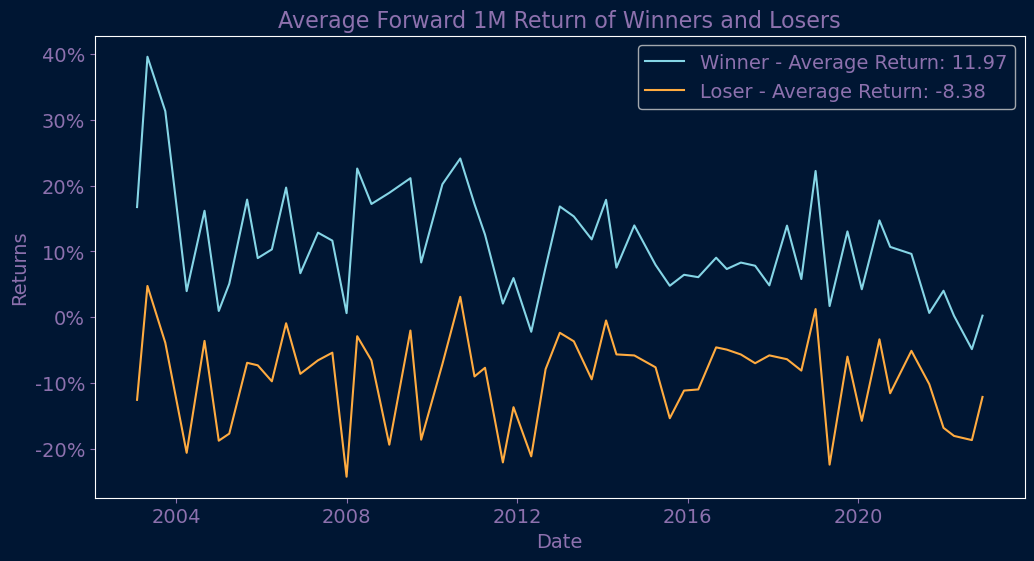

In [74]:
winner_return = filtered_stocks_return[filtered_stocks_return["Outcome"] == "Winner"]
loser_return = filtered_stocks_return[filtered_stocks_return["Outcome"] == "Loser"]

average_winner_return = np.average(winner_return["Forward 1M Return"].to_list())*100
average_loser_return = np.average(loser_return["Forward 1M Return"].to_list())*100

# Create a new figure and set the figure size
fig = plt.figure(figsize=(12, 6), facecolor="#001633")

# Add a subplot to the figure
ax1 = fig.add_subplot(1, 1, 1)

# Plot the cumulative return data
plt.plot(winner_return['date'][::3], winner_return['Forward 1M Return'][::3], 
         label=f"Winner - Average Return: {average_winner_return:.2f}", color='#85d5e6')
plt.plot(loser_return['date'][::3], loser_return['Forward 1M Return'][::3], 
         label=f"Loser - Average Return: {average_loser_return:.2f}", color='#ffab40')

# Set the x- and y-axis labels and title
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Returns', fontsize=14)
ax1.set_title("Average Forward 1M Return of Winners and Losers", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax1.set_facecolor('#001633')
#plt.rcParams['axes.facecolor'] = '#001633'
# Add a legend
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_color('white')

plt.legend(loc='best', facecolor='#001633', fontsize=14)
plt.rcParams['text.color'] = '#8D71AE'
plt.rcParams['axes.labelcolor'] = '#8D71AE'
plt.rcParams['xtick.color'] = '#8D71AE'
plt.rcParams['ytick.color'] = '#8D71AE'
# Show the plot
plt.show()

## Created the validation data by filtering the dataset from Jan 2021 to Dec 2022

In [45]:
start_date = '2021-01-01'
end_date = '2022-12-31'

# Filtering the DataFrame between two dates
validation_data_original = filtered_stocks[(filtered_stocks['date'] >= start_date) & 
                                           (filtered_stocks['date'] <= end_date)]
validation_data_original

,PERMNO,date,Forward 1M Return,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,pdate,year,month,Outcome
242,77338,2021-03-31,0.108252,-0.034284,-0.372283,0.290482,0.210492,0.197492,0.178203,0.220619,...,-0.164670,-0.023615,0.260309,-0.461432,0.452013,-0.320852,2021-03-31,2021,3,1
243,92611,2021-03-31,0.103103,-0.037431,-0.665287,0.328480,0.189977,0.171561,0.164482,0.207367,...,-0.162579,-0.109881,-0.288121,0.820359,0.961688,0.106122,2021-03-31,2021,3,1
255,76076,2021-03-31,-0.008316,-0.096054,-0.465658,-0.063725,-0.194613,-0.196866,-0.093962,-0.042243,...,-0.142384,-0.106726,0.592075,-0.344905,0.073397,-0.163798,2021-03-31,2021,3,0
256,12449,2021-03-31,0.071064,-0.072007,-0.528444,0.122832,-0.045437,-0.038608,0.039327,0.086490,...,-0.159143,-0.239323,-0.288121,-0.111853,-0.115910,-0.145925,2021-03-31,2021,3,1
255,79698,2021-03-31,0.073021,0.215285,-0.657237,0.193300,0.336676,0.317183,0.374885,0.410578,...,-0.068116,-0.039746,-0.288121,-0.461432,-0.436277,0.386614,2021-03-31,2021,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,27828,2022-11-30,-0.096788,-0.107101,-0.251872,-0.254173,-0.387651,-0.391563,-0.460756,-0.444364,...,-0.174077,-0.131944,-0.086845,-0.101025,0.771554,-0.475868,2022-11-30,2022,11,0
14,91849,2022-11-30,-0.095601,0.110325,-0.746270,0.110245,0.308873,0.310178,0.217762,0.223202,...,-0.075064,-0.045794,-0.254159,-0.443295,0.685605,0.158790,2022-11-30,2022,11,0
15,15488,2022-11-30,-0.091698,0.066116,-0.613239,0.286510,0.540863,0.533046,0.357863,0.361042,...,-0.290405,-0.140725,0.125514,0.320231,-0.552054,-0.173820,2022-11-30,2022,11,0
0,90215,2022-11-30,-0.172605,0.673761,-0.371004,1.177476,6.548625,6.220229,4.978973,4.899242,...,-0.386388,-0.043203,0.871991,0.557187,-0.723951,-0.364053,2022-11-30,2022,11,0


## Assigned the train test data by filtering the dataset before Dec 2020

In [46]:
end_date = '2020-12-31'

train_test_data = filtered_stocks[(filtered_stocks['date'] <= end_date)]
train_test_data

,PERMNO,date,Forward 1M Return,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,pdate,year,month,Outcome
3329,46886,2003-01-31,0.095282,-0.042314,-0.428833,0.338624,0.289464,0.311351,0.284230,0.323313,...,-0.207711,0.029763,0.370281,-0.365043,0.174318,0.037978,2003-01-31,2003,1,1
3327,10078,2003-01-31,0.113269,-0.084162,0.652814,0.532163,-2.866162,-2.878622,-1.209652,-1.449528,...,-0.166778,0.030797,0.234904,-0.085217,-0.014693,-0.607130,2003-01-31,2003,1,1
3326,51369,2003-01-31,0.115496,-0.074262,0.243847,-0.460109,-0.267038,-0.272760,-0.250708,-0.311517,...,-0.216926,0.029671,0.585653,-0.190152,-0.601622,-0.544543,2003-01-31,2003,1,1
3325,76795,2003-01-31,0.129252,-0.053825,-0.538831,0.059374,-0.022202,-0.025938,-0.035523,-0.056149,...,-0.191566,0.029630,-0.014312,-0.085217,2.094270,0.030806,2003-01-31,2003,1,1
3324,11081,2003-01-31,0.129924,-0.026262,-0.885748,0.203941,0.235669,0.247733,0.236357,0.266500,...,0.325974,0.064844,-0.171225,-0.015261,-0.323079,3.362614,2003-01-31,2003,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,92293,2020-12-31,0.197152,0.205964,-0.256664,0.033023,2.202943,2.143064,0.074627,0.130789,...,0.027903,0.013743,0.966211,-0.455835,-0.162372,-0.079483,2020-12-31,2020,12,1
257,10890,2020-12-31,0.213923,-0.005786,0.305329,-0.007740,-0.662401,-0.654299,-0.273128,-0.109008,...,-0.242509,-0.160127,-0.201730,-0.428120,0.941575,-0.481958,2020-12-31,2020,12,1
257,88873,2020-12-31,-0.180577,0.141187,-0.068438,0.084125,0.838711,0.815819,1.256948,1.255387,...,-0.259193,-0.087235,-0.293750,-0.455835,0.510147,-0.394199,2020-12-31,2020,12,0
258,14579,2020-12-31,-0.160332,0.214075,-0.308526,0.320230,2.163576,2.140989,1.620396,1.601091,...,-0.197633,-0.142789,0.428250,0.514168,0.472080,2.148722,2020-12-31,2020,12,0


## Assigning the train data to be from 2003-2018 and test to be from 2019-2020 and dropping the object and datetime variables along with the forward 1M return, year and month

In [47]:
start_date = '2019-01-01'
end_date = '2020-12-31'

# Filtering the DataFrame between two dates
test = train_test_data[(train_test_data['date'] >= start_date) & (train_test_data['date'] <= end_date)]
train = train_test_data[(train_test_data['date'] <= start_date)]

train = train.select_dtypes(exclude=['object', 'datetime64[ns]'])
train = train.drop(columns=['Forward 1M Return', 'year', 'month'])

test = test.select_dtypes(exclude=['object', 'datetime64[ns]'])
test = test.drop(columns=['Forward 1M Return', 'year', 'month'])

validation_data = validation_data_original.select_dtypes(exclude=['object', 'datetime64[ns]'])
validation_data = validation_data.drop(columns=['Forward 1M Return','year', 'month'])

x_train = train.drop(columns=['Outcome'], axis=1)
y_train = train['Outcome']

x_test = test.drop(columns=['Outcome'], axis=1)
y_test = test['Outcome']

x_val = validation_data.drop(columns=['Outcome'], axis=1)
y_val = validation_data['Outcome']

## Trying a Logistic Regression Model

In [48]:
lr = LogisticRegression()
modelFit = lr.fit(x_train, y_train)

In [49]:
print(f"Cross Validation Accuracy Score: {np.round(np.mean(cross_val_score(lr, x_train, y_train, scoring='accuracy', cv=10)), 4)}")
print(f"Cross Validation AUC Score: {np.round(np.mean(cross_val_score(lr, x_train, y_train, scoring='roc_auc', cv=10)), 4)}")

Cross Validation Accuracy Score: 0.5
Cross Validation AUC Score: 0.5124


## Trying a Random Forest Model

In [50]:
rf = RandomForestClassifier(n_jobs=-1, random_state=22)
modelFit = rf.fit(x_train, y_train)

In [51]:
print(f"Cross Validation Accuracy Score: {np.round(np.mean(cross_val_score(rf, x_train, y_train, scoring='accuracy', cv=10)), 4)}")
print(f"Cross Validation AUC Score: {np.round(np.mean(cross_val_score(rf, x_train, y_train, scoring='roc_auc', cv=10)), 4)}")

Cross Validation Accuracy Score: 0.5104
Cross Validation AUC Score: 0.5107


## Training a LGBM model

In [52]:
lgbm = LGBMClassifier(n_jobs=-1, random_state=42)
modelFit = lgbm.fit(x_train, y_train)

In [53]:
print(f"Cross Validation Accuracy Score: {np.round(np.mean(cross_val_score(lgbm, x_train, y_train, scoring='accuracy', cv=10)), 4)}")
print(f"Cross Validation AUC Score: {np.round(np.mean(cross_val_score(lgbm, x_train, y_train, scoring='roc_auc', cv=10)), 4)}")

Cross Validation Accuracy Score: 0.5013
Cross Validation AUC Score: 0.5122


Looking at a combination of the accuracy and AUC scores of all 3 models, the LightGBM was the model we selected. The LightGBM has a higher AUC score compared to the random forest model and when comparing to logistic regression, the logistic regression has a slightly higher AUC compared to the LightGBM model, however the LightGBM provides a feature importance score. This score will help better understand the most important features in classifying the winner and loser stock.

## Selecting the top 10 most important features from the training dataset and plotting it

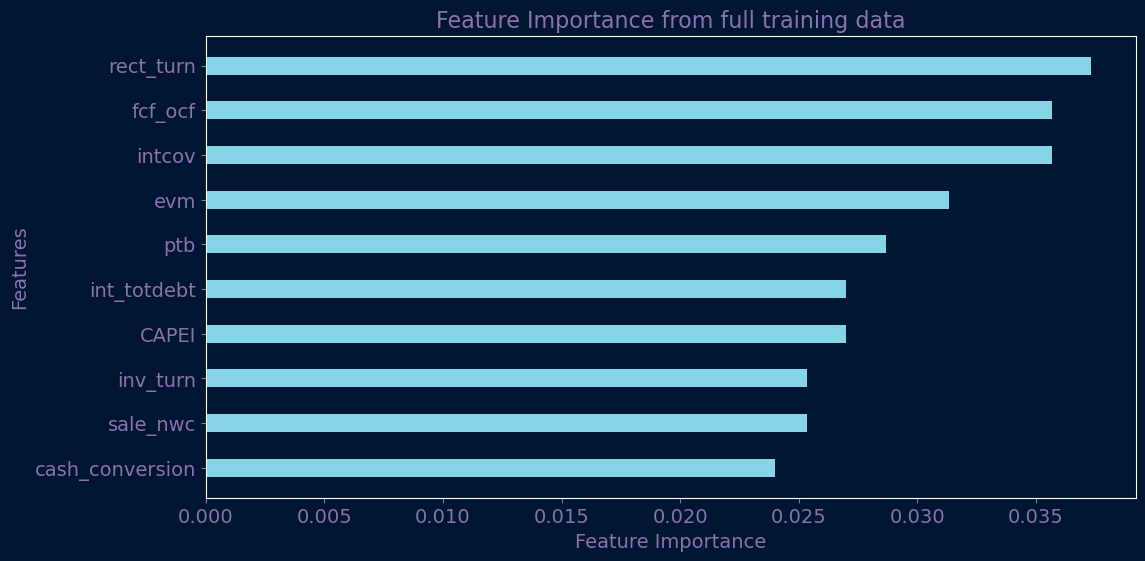

In [54]:
import matplotlib.pyplot as plt

importances = (modelFit.feature_importances_)/sum(modelFit.feature_importances_)
indices = np.argsort(importances)[-10:]

fig = plt.figure(figsize=(12, 6), facecolor="#001633")

# Add a subplot to the figure
ax1 = fig.add_subplot(1, 1, 1)

# Plot the cumulative return data
plt.barh(range(len(indices)), importances[indices], color='#85d5e6', height=0.4, align='center')

# Set the x- and y-axis labels and title
ax1.set_xlabel('Feature Importance', fontsize=14)
ax1.set_ylabel('Features', fontsize=14)
ax1.set_title("Feature Importance from full training data", fontsize=16)
plt.yticks(range(len(indices)), [x_train.columns.values.tolist()[i] for i in indices][::-1], fontsize=14)
plt.xticks(fontsize=14)
ax1.set_facecolor('#001633')
#plt.rcParams['axes.facecolor'] = '#001633'
# Add a legend
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_color('white')

plt.rcParams['text.color'] = '#8D71AE'
plt.rcParams['axes.labelcolor'] = '#8D71AE'
plt.rcParams['xtick.color'] = '#8D71AE'
plt.rcParams['ytick.color'] = '#8D71AE'
# Show the plot
plt.show()

## Predicting the labels on the test data and comparing with the outcome to see how accurate our model predicts the outcome

In [55]:
y_pred_test = modelFit.predict(x_test)
y_pred_proba_test = modelFit.predict_proba(x_test)[:,1]
df_test = pd.concat([x_test, y_test], axis=1)
df_test["Predicted"] = y_pred_test
df_test["Probability Predicted"] = y_pred_proba_test
df_test

,PERMNO,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,...,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,Outcome,Predicted,Probability Predicted
518,27828,0.053439,-0.776579,0.017214,-0.139936,-0.135411,-0.191993,-0.221050,-0.814413,-0.305526,...,9.518884,0.718045,-0.159805,-0.144651,-0.169437,1.175773,2.075324,0,0,0.491122
519,22779,0.075582,0.560371,0.034655,0.095376,0.118697,-4.924111,-4.861472,-0.044732,0.238149,...,0.470609,-0.134558,-0.131946,0.694491,-0.415132,-1.311709,-0.390885,1,0,0.493383
520,11403,0.071391,-0.619225,0.079352,0.391412,0.392952,0.597018,0.552672,1.294184,0.408867,...,-0.011901,-0.123648,-0.148993,4.967659,-0.316854,-1.860671,0.550557,1,0,0.324670
521,79879,-0.078993,-0.312887,0.067106,-2.218697,-2.130684,-0.982995,-0.996724,-0.074335,0.806137,...,-0.390272,-0.147599,-0.181742,1.533633,-0.341424,-0.453957,-0.225820,1,1,0.597406
522,91668,0.059191,-0.339671,0.050670,0.028335,0.031341,-0.000039,-0.032815,0.661462,0.201488,...,-0.455532,-0.175519,-0.185722,0.565392,-0.415132,0.712587,-0.257254,1,0,0.463270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,92293,0.205964,-0.256664,0.033023,2.202943,2.143064,0.074627,0.130789,-0.556511,-0.112805,...,0.475427,0.027903,0.013743,0.966211,-0.455835,-0.162372,-0.079483,1,0,0.453044
257,10890,-0.005786,0.305329,-0.007740,-0.662401,-0.654299,-0.273128,-0.109008,-0.715461,-0.434744,...,3.272097,-0.242509,-0.160127,-0.201730,-0.428120,0.941575,-0.481958,1,0,0.178250
257,88873,0.141187,-0.068438,0.084125,0.838711,0.815819,1.256948,1.255387,1.067320,0.540167,...,-0.530731,-0.259193,-0.087235,-0.293750,-0.455835,0.510147,-0.394199,0,0,0.498924
258,14579,0.214075,-0.308526,0.320230,2.163576,2.140989,1.620396,1.601091,6.394041,2.173315,...,0.062891,-0.197633,-0.142789,0.428250,0.514168,0.472080,2.148722,0,1,0.577756


## Printing the accuracy score of the test data

In [56]:
print(f"Test Accuracy Score: {np.round(accuracy_score(y_test, y_pred_test), 4)}")
print(f"Test AUC Score: {np.round(roc_auc_score(y_test, y_pred_proba_test), 4)}")

Test Accuracy Score: 0.4892
Test AUC Score: 0.4737


## Predicting the labels on the validation data

In [57]:
y_pred_valid = modelFit.predict(x_val)
y_pred_proba_valid = modelFit.predict_proba(x_val)[:,1]
df_val = x_val
df_val["Predicted"] = y_pred_valid
df_val["Probability Predicted"] = y_pred_valid
df_val

,PERMNO,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,...,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,Predicted,Probability Predicted
242,77338,-0.034284,-0.372283,0.290482,0.210492,0.197492,0.178203,0.220619,0.866562,0.206731,...,0.022569,-0.511634,-0.164670,-0.023615,0.260309,-0.461432,0.452013,-0.320852,0,0
243,92611,-0.037431,-0.665287,0.328480,0.189977,0.171561,0.164482,0.207367,3.028722,0.404698,...,-0.629594,-0.445451,-0.162579,-0.109881,-0.288121,0.820359,0.961688,0.106122,0,0
255,76076,-0.096054,-0.465658,-0.063725,-0.194613,-0.196866,-0.093962,-0.042243,0.124051,-0.127460,...,-0.153378,-0.100481,-0.142384,-0.106726,0.592075,-0.344905,0.073397,-0.163798,0,0
256,12449,-0.072007,-0.528444,0.122832,-0.045437,-0.038608,0.039327,0.086490,1.277425,-0.108168,...,-0.868975,-0.462436,-0.159143,-0.239323,-0.288121,-0.111853,-0.115910,-0.145925,0,0
255,79698,0.215285,-0.657237,0.193300,0.336676,0.317183,0.374885,0.410578,-0.017914,-0.040019,...,3.372512,-0.048355,-0.068116,-0.039746,-0.288121,-0.461432,-0.436277,0.386614,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,27828,-0.107101,-0.251872,-0.254173,-0.387651,-0.391563,-0.460756,-0.444364,-0.874421,-0.455007,...,-0.610019,2.491440,-0.174077,-0.131944,-0.086845,-0.101025,0.771554,-0.475868,1,1
14,91849,0.110325,-0.746270,0.110245,0.308873,0.310178,0.217762,0.223202,0.002173,0.958090,...,0.851650,-0.146542,-0.075064,-0.045794,-0.254159,-0.443295,0.685605,0.158790,0,0
15,15488,0.066116,-0.613239,0.286510,0.540863,0.533046,0.357863,0.361042,0.097746,-0.169622,...,4.734381,-0.163058,-0.290405,-0.140725,0.125514,0.320231,-0.552054,-0.173820,1,1
0,90215,0.673761,-0.371004,1.177476,6.548625,6.220229,4.978973,4.899242,0.838346,0.211337,...,-0.850016,-0.307193,-0.386388,-0.043203,0.871991,0.557187,-0.723951,-0.364053,1,1


In [58]:
print(f"Validation Accuracy Score: {np.round(accuracy_score(y_val, y_pred_valid), 4)}")
print(f"Validation AUC Score: {np.round(roc_auc_score(y_val, y_pred_proba_valid), 4)}")

Validation Accuracy Score: 0.4825
Validation AUC Score: 0.4704


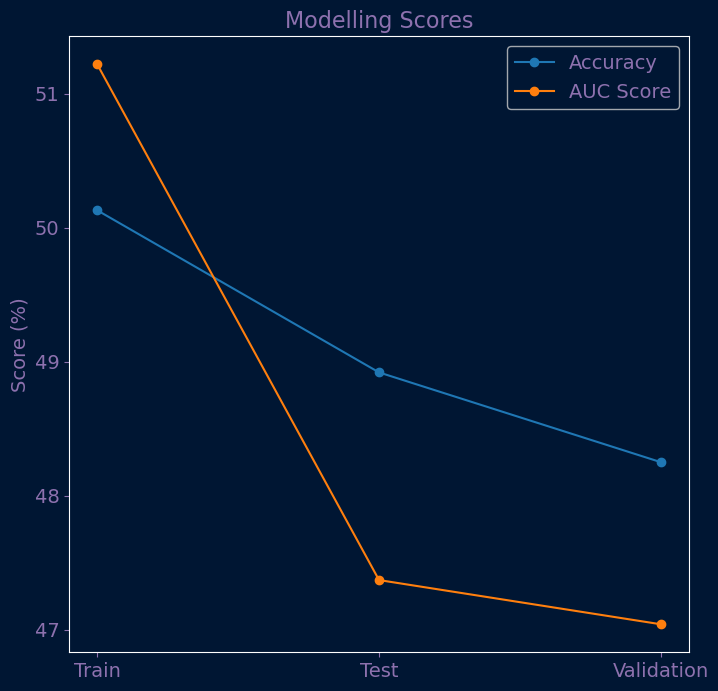

In [59]:
datasets = ["Train", "Test", "Validation"]
accuracy_score = [50.13, 48.92, 48.25]
roc_auc_score = [51.22, 47.37, 47.04]

fig = plt.figure(figsize=(8, 8), facecolor="#001633")

# Add a subplot to the figure
ax1 = fig.add_subplot(1, 1, 1)

plt.plot(datasets, accuracy_score, label="Accuracy", marker='o')
plt.plot(datasets, roc_auc_score, label="AUC Score", marker='o')

ax1.set_ylabel('Score (%)', fontsize=14)
ax1.set_title("Modelling Scores", fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax1.set_facecolor('#001633')
#plt.rcParams['axes.facecolor'] = '#001633'
# Add a legend
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_color('white')
    
plt.legend(loc='best', facecolor='#001633', fontsize=14)
plt.rcParams['text.color'] = '#8D71AE'
plt.rcParams['axes.labelcolor'] = '#8D71AE'
plt.rcParams['xtick.color'] = '#8D71AE'
plt.rcParams['ytick.color'] = '#8D71AE'
plt.show()


## Looking at the filtered datasest from 2003 to 2020 and doing a 3 year moving window analysis to see what are the most important features in predicting the outcome

In [60]:
merged_df = filtered_stocks.drop(columns=[ 'Forward 1M Return'])
merged_df = merged_df.select_dtypes(exclude=['object', 'datetime64[ns]'])
merged_df

,PERMNO,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,...,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,year,month,Outcome
3329,46886,-0.042314,-0.428833,0.338624,0.289464,0.311351,0.284230,0.323313,0.433893,0.441306,...,-0.414846,-0.207711,0.029763,0.370281,-0.365043,0.174318,0.037978,2003,1,1
3327,10078,-0.084162,0.652814,0.532163,-2.866162,-2.878622,-1.209652,-1.449528,-0.297107,0.218998,...,-0.233506,-0.166778,0.030797,0.234904,-0.085217,-0.014693,-0.607130,2003,1,1
3326,51369,-0.074262,0.243847,-0.460109,-0.267038,-0.272760,-0.250708,-0.311517,-0.094615,-1.238051,...,-0.538002,-0.216926,0.029671,0.585653,-0.190152,-0.601622,-0.544543,2003,1,1
3325,76795,-0.053825,-0.538831,0.059374,-0.022202,-0.025938,-0.035523,-0.056149,0.256548,-6.594931,...,-0.318842,-0.191566,0.029630,-0.014312,-0.085217,2.094270,0.030806,2003,1,1
3324,11081,-0.026262,-0.885748,0.203941,0.235669,0.247733,0.236357,0.266500,-0.070572,0.402487,...,2.400290,0.325974,0.064844,-0.171225,-0.015261,-0.323079,3.362614,2003,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,27828,-0.107101,-0.251872,-0.254173,-0.387651,-0.391563,-0.460756,-0.444364,-0.874421,-0.455007,...,2.491440,-0.174077,-0.131944,-0.086845,-0.101025,0.771554,-0.475868,2022,11,0
14,91849,0.110325,-0.746270,0.110245,0.308873,0.310178,0.217762,0.223202,0.002173,0.958090,...,-0.146542,-0.075064,-0.045794,-0.254159,-0.443295,0.685605,0.158790,2022,11,0
15,15488,0.066116,-0.613239,0.286510,0.540863,0.533046,0.357863,0.361042,0.097746,-0.169622,...,-0.163058,-0.290405,-0.140725,0.125514,0.320231,-0.552054,-0.173820,2022,11,0
0,90215,0.673761,-0.371004,1.177476,6.548625,6.220229,4.978973,4.899242,0.838346,0.211337,...,-0.307193,-0.386388,-0.043203,0.871991,0.557187,-0.723951,-0.364053,2022,11,0


In [61]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt


filtered_data = []

feature_importance = pd.DataFrame()

Year = []
feature1 = []
feature2 = []
feature3 = []
feature4 = []
feature5 = []

for year in range(2003, 2018, 1):
    mask = (merged_df['year'] > year) & (merged_df['year'] <= year+3)
    filtered_df = merged_df.loc[mask]
    X1 = filtered_df.drop(columns=['Outcome'], axis=1)
    y1 = filtered_df['Outcome']

    lgbm = LGBMClassifier(n_jobs=-1, random_state=42)
    modelFit = lgbm.fit(X1, y1)
    
    importances = (modelFit.feature_importances_)/sum(modelFit.feature_importances_)
    indices = np.argsort(importances)[-5:]
    important_features = [X1.columns.values.tolist()[i] for i in indices][::-1]
    
    Year.append(f"{year}-{year+3}")
    feature1.append(important_features[0])
    feature2.append(important_features[1])
    feature3.append(important_features[2])
    feature4.append(important_features[3])
    feature5.append(important_features[4])

feature_importance["Year Range"] = Year
feature_importance["Feature 1"] = feature1
feature_importance["Feature 2"] = feature2
feature_importance["Feature 3"] = feature3
feature_importance["Feature 4"] = feature4
feature_importance["Feature 5"] = feature5
feature_importance

,Year Range,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,2003-2006,sale_nwc,rect_turn,inv_turn,pcf,cash_conversion
1,2004-2007,sale_nwc,inv_turn,rect_turn,pcf,cash_conversion
2,2005-2008,sale_nwc,inv_turn,rect_turn,cash_conversion,intcov
3,2006-2009,sale_nwc,rect_turn,inv_turn,ps,pcf
4,2007-2010,int_debt,rect_turn,inv_turn,pcf,CAPEI
5,2008-2011,ps,cash_conversion,CAPEI,pe_inc,ptb
6,2009-2012,cash_conversion,sale_nwc,evm,rd_sale,debt_ebitda
7,2010-2013,cash_conversion,dltt_be,evm,pe_exi,sale_nwc
8,2011-2014,inv_turn,dltt_be,pcf,cash_conversion,int_debt
9,2012-2015,cash_conversion,sale_nwc,ptb,dltt_be,inv_turn


## Counting the number of times a feature appears in the moving 3 year window 

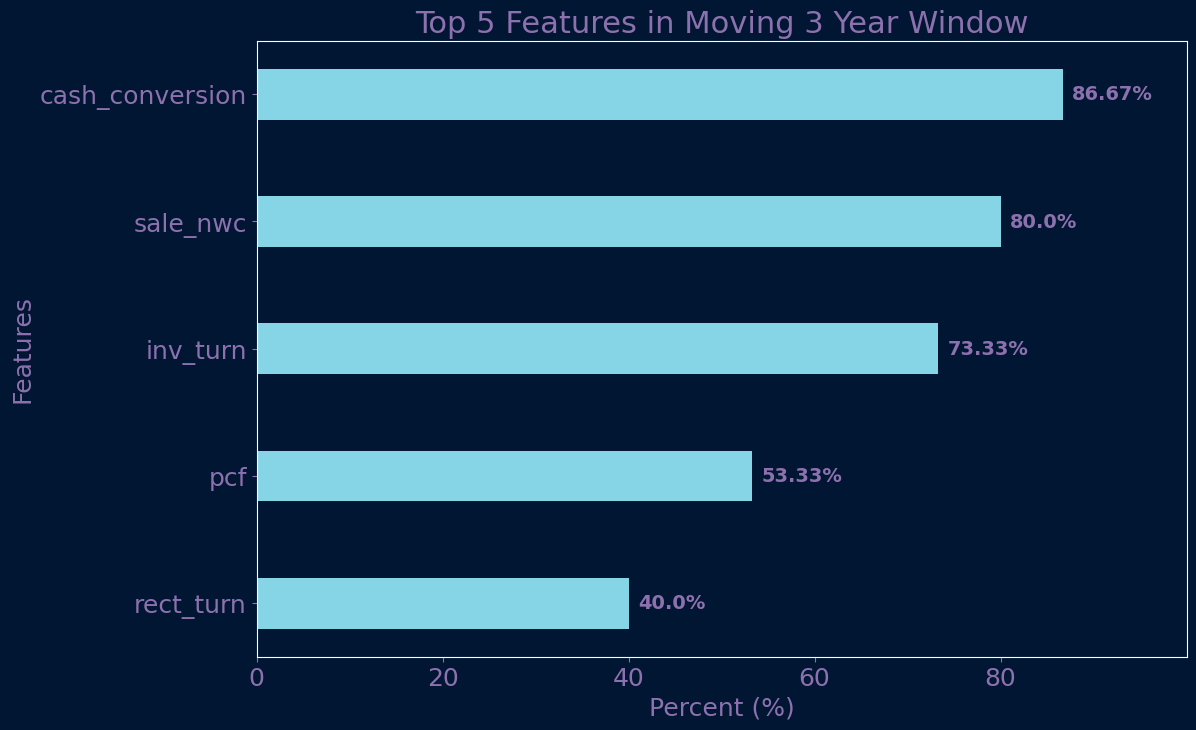

In [62]:
top_features = feature_importance.loc[:, feature_importance.columns != 'Year Range'].stack().value_counts()[:5][::-1]
top_features = pd.DataFrame(top_features).reset_index()
top_features['percent'] = np.round((top_features['count']/15)*100,2)
fig = plt.figure(figsize=(12, 8), facecolor="#001633")

# Add a subplot to the figure
ax1 = fig.add_subplot(1, 1, 1)

# Plot the cumulative return data
plt.barh(top_features["index"], top_features["percent"], color='#85d5e6', height=0.4, align='center')

# Set the x- and y-axis labels and title
ax1.set_xlabel("Percent (%)", fontsize=18)
ax1.set_ylabel('Features', fontsize=18)
ax1.set_title("Top 5 Features in Moving 3 Year Window", fontsize=22)
plt.xlim(0, 100)
plt.xticks([0, 20, 40, 60, 80], fontsize=18)
plt.yticks(fontsize=18)
ax1.set_facecolor('#001633')
#plt.rcParams['axes.facecolor'] = '#001633'
# Add a legend
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_color('white')

for i, v in enumerate(top_features['percent']):
    ax1.text(v+1, i, str(v)+"%", color='#8D71AE', fontweight='bold', fontsize=14, ha='left', va='center')    
    
plt.rcParams['text.color'] = '#8D71AE'
plt.rcParams['axes.labelcolor'] = '#8D71AE'
plt.rcParams['xtick.color'] = '#8D71AE'
plt.rcParams['ytick.color'] = '#8D71AE'
# Show the plot
plt.show()

## Created a list of the 5 most common features found in the 3 year moving window analysis

In [63]:
top_5_features = feature_importance.loc[:, feature_importance.columns != 'Year Range'].stack().value_counts()[:5][::-1]
top_5_features = pd.DataFrame(top_5_features).reset_index()
top_5_features_list = top_5_features["index"].to_list()
top_5_features_list

['rect_turn', 'pcf', 'inv_turn', 'sale_nwc', 'cash_conversion']

## Created a table to show how important each feature was in the moving 3 year window analysis

In [64]:
values_to_check = top_5_features_list

# Create a new column for each value, indicating if it's present in that row
for value in values_to_check:
    feature_importance[value + '_column'] = feature_importance.apply(lambda row: next((col for col, v in row.items() if v == value), None), axis=1)

# Display the result
top_5_features = feature_importance[['Year Range'] + [value + '_column' for value in values_to_check]]
top_5_features = top_5_features.replace('Feature 1', 5)
top_5_features = top_5_features.replace('Feature 2', 4)
top_5_features = top_5_features.replace('Feature 3', 3)
top_5_features = top_5_features.replace('Feature 4', 2)
top_5_features = top_5_features.replace('Feature 5', 1)
top_5_features = top_5_features.fillna(0)
top_5_features

,Year Range,rect_turn_column,pcf_column,inv_turn_column,sale_nwc_column,cash_conversion_column
0,2003-2006,4.0,2.0,3.0,5.0,1.0
1,2004-2007,3.0,2.0,4.0,5.0,1.0
2,2005-2008,3.0,0.0,4.0,5.0,2.0
3,2006-2009,4.0,1.0,3.0,5.0,0.0
4,2007-2010,4.0,2.0,3.0,0.0,0.0
5,2008-2011,0.0,0.0,0.0,0.0,4.0
6,2009-2012,0.0,0.0,0.0,4.0,5.0
7,2010-2013,0.0,0.0,0.0,1.0,5.0
8,2011-2014,0.0,3.0,5.0,0.0,2.0
9,2012-2015,0.0,0.0,1.0,4.0,5.0


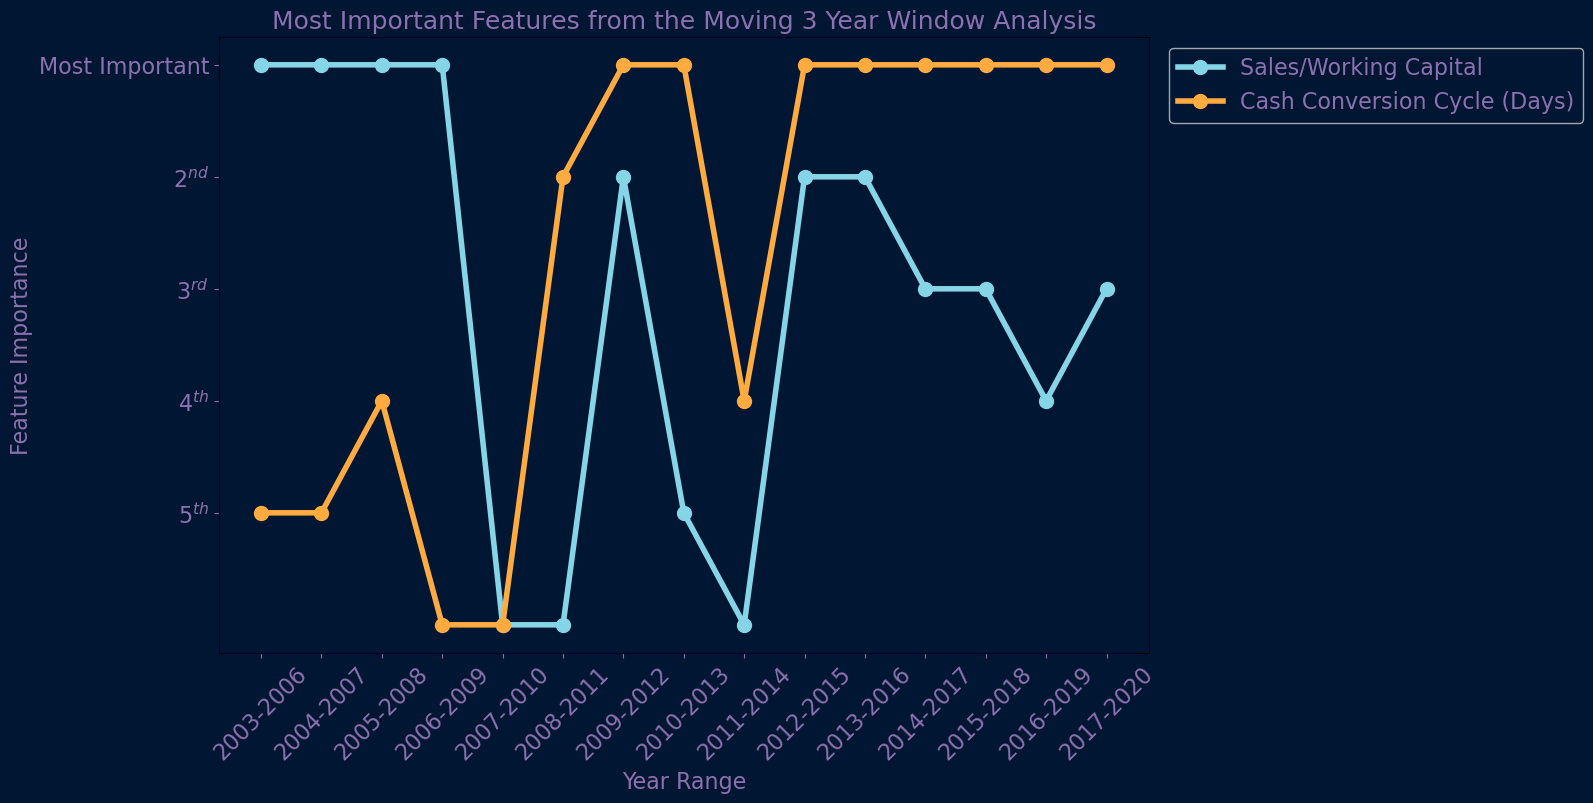

In [78]:
list_of_top_5_features = ['Sales/Working Capital','Cash Conversion Cycle (Days)']

fig = plt.figure(figsize=(12, 8), facecolor="#001632")
ax = fig.add_subplot(1, 1, 1)

ax.plot(top_5_features['Year Range'], top_5_features['sale_nwc_column'], label='Sales/Working Capital', 
        color='#85d5e6', linewidth=4, marker='o', markersize=10)
ax.plot(top_5_features['Year Range'], top_5_features['cash_conversion_column'], 
        label='Cash Conversion Cycle (Days)', color='#ffab40', linewidth=4, marker='o', markersize=10)
ax.set_facecolor('#001632')
ax.set_xlabel('Year Range', fontsize=16)
ax.set_ylabel('Feature Importance', fontsize=16)
ax.set_title('Most Important Features from the Moving 3 Year Window Analysis', fontsize=18)
ax.set_yticks(np.arange(1,6), [r"$5^{th}$", r"$4^{th}$", r"$3^{rd}$", r"$2^{nd}$", "Most Important"])
ax.tick_params(axis='x', rotation=45, labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(bbox_to_anchor=(1.01,1), facecolor='#001632', fontsize=16)

## Created an animation to show the 5 most common features and the level of importance it had in each 3 year window

MovieWriter imagemagick unavailable; using Pillow instead.


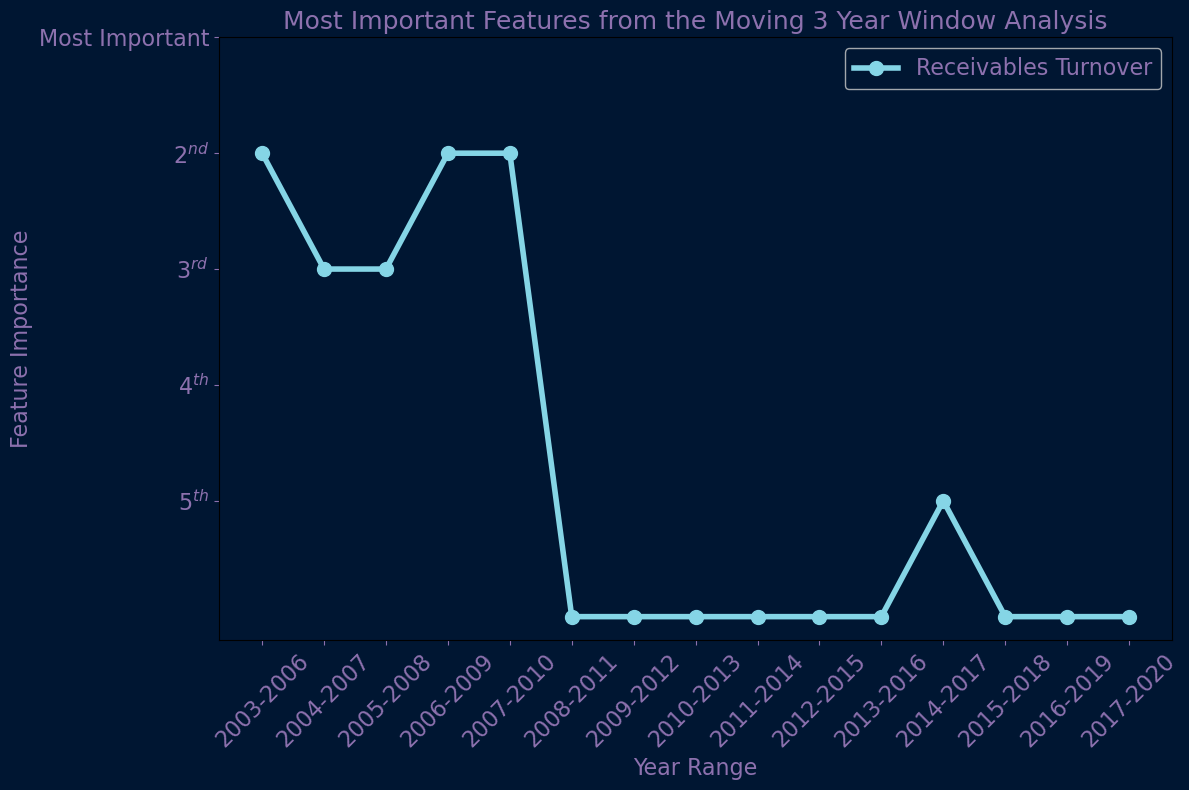

In [65]:
from matplotlib.animation import FuncAnimation

list_of_top_5_features = ['Receivables Turnover', 'Price/Cash Flow', 'Inventory Turnover', 
                          'Sales/Working Capital','Cash Conversion Cycle (Days)']

fig = plt.figure(figsize=(12, 8), facecolor="#001632")
ax = fig.add_subplot(1, 1, 1)

# Function to update the line charts in each frame of the animation
def update(frame):
    ax.clear()  # Clear the previous plot
    feature = top_5_features_list[frame]
    data = top_5_features[feature + '_column']
    label = list_of_top_5_features[frame]
    ax.plot(top_5_features['Year Range'], data, label=label, color='#85d5e6', linewidth=4, marker='o', markersize=10)

    ax.set_facecolor('#001632')
    ax.set_xlabel('Year Range', fontsize=16)
    ax.set_ylabel('Feature Importance', fontsize=16)
    ax.set_title('Most Important Features from the Moving 3 Year Window Analysis', fontsize=18)
    ax.set_yticks(np.arange(1,6), [r"$5^{th}$", r"$4^{th}$", r"$3^{rd}$", r"$2^{nd}$", "Most Important"])
    ax.tick_params(axis='x', rotation=45, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.legend(loc='best', facecolor='#001632', fontsize=16)
    plt.tight_layout()
    plt.savefig(f"feature{frame+1}.jpg")

animation = FuncAnimation(fig, update, frames=range(5), interval=5000)  # 5 frames, 5-second interval

# Save the animation as a gif
animation.save("finance.gif", writer='imagemagick', fps=0.25)


## Adding the date column back to ensure the stock is there at the end of 2022 for the top 15 stock selection

In [66]:
df_val["Date"] = validation_data_original['pdate']
df_val

,PERMNO,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,...,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,accrual,ptb,Predicted,Probability Predicted,Date
242,77338,-0.034284,-0.372283,0.290482,0.210492,0.197492,0.178203,0.220619,0.866562,0.206731,...,-0.511634,-0.164670,-0.023615,0.260309,-0.461432,0.452013,-0.320852,0,0,2021-03-31
243,92611,-0.037431,-0.665287,0.328480,0.189977,0.171561,0.164482,0.207367,3.028722,0.404698,...,-0.445451,-0.162579,-0.109881,-0.288121,0.820359,0.961688,0.106122,0,0,2021-03-31
255,76076,-0.096054,-0.465658,-0.063725,-0.194613,-0.196866,-0.093962,-0.042243,0.124051,-0.127460,...,-0.100481,-0.142384,-0.106726,0.592075,-0.344905,0.073397,-0.163798,0,0,2021-03-31
256,12449,-0.072007,-0.528444,0.122832,-0.045437,-0.038608,0.039327,0.086490,1.277425,-0.108168,...,-0.462436,-0.159143,-0.239323,-0.288121,-0.111853,-0.115910,-0.145925,0,0,2021-03-31
255,79698,0.215285,-0.657237,0.193300,0.336676,0.317183,0.374885,0.410578,-0.017914,-0.040019,...,-0.048355,-0.068116,-0.039746,-0.288121,-0.461432,-0.436277,0.386614,0,0,2021-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,27828,-0.107101,-0.251872,-0.254173,-0.387651,-0.391563,-0.460756,-0.444364,-0.874421,-0.455007,...,2.491440,-0.174077,-0.131944,-0.086845,-0.101025,0.771554,-0.475868,1,1,2022-11-30
14,91849,0.110325,-0.746270,0.110245,0.308873,0.310178,0.217762,0.223202,0.002173,0.958090,...,-0.146542,-0.075064,-0.045794,-0.254159,-0.443295,0.685605,0.158790,0,0,2022-11-30
15,15488,0.066116,-0.613239,0.286510,0.540863,0.533046,0.357863,0.361042,0.097746,-0.169622,...,-0.163058,-0.290405,-0.140725,0.125514,0.320231,-0.552054,-0.173820,1,1,2022-11-30
0,90215,0.673761,-0.371004,1.177476,6.548625,6.220229,4.978973,4.899242,0.838346,0.211337,...,-0.307193,-0.386388,-0.043203,0.871991,0.557187,-0.723951,-0.364053,1,1,2022-11-30


## Filtering the validation set to show only the winners and filtering the dataset to ensure it has data on Nov 30 2022

In [67]:
df_val_winners = df_val[df_val["Predicted"] == 1]
result = df_val_winners.groupby('PERMNO').agg({'Predicted': 'count', 'Date': 'max'})
result = result[result["Date"] == pd.to_datetime('2022-11-30')]
result

,Predicted,Date
PERMNO,,
10890,5,2022-11-30
15488,5,2022-11-30
15707,5,2022-11-30
19807,6,2022-11-30
27828,6,2022-11-30
40125,2,2022-11-30
46886,8,2022-11-30
48486,6,2022-11-30
53613,7,2022-11-30


## Selecting the top 15 stocks by the number of times it was a winner in the validation data

In [68]:
group_of_stocks = result.rename(columns={'Predicted': 'Number of Months it was a winner'})
group_of_stocks = group_of_stocks.sort_values(by=['Number of Months it was a winner'], ascending=False)
top_15_stocks = group_of_stocks.iloc[0:15]
top_15_stocks = top_15_stocks.reset_index()
top_15_stocks

,PERMNO,Number of Months it was a winner,Date
0,78987,11,2022-11-30
1,84519,10,2022-11-30
2,66384,9,2022-11-30
3,59328,8,2022-11-30
4,46886,8,2022-11-30
5,79108,7,2022-11-30
6,53613,7,2022-11-30
7,75510,7,2022-11-30
8,91233,6,2022-11-30
9,90215,6,2022-11-30


## From the merged stock and sector info dataset, selecting the permno, company name and ticker to merge with the top 15 stocks to know more details of the selected stock

In [69]:
stock_last = stock[stock["date"] == pd.to_datetime("2022-11-30")]
stock_last

,PERMNO,date,SIC_Industry_Code,TICKER,COMNAM,PERMCO,CUSIP,VOLUME,RETURN,Price Index,Forward 1M Return,Forward 3M Return,Forward 6M Return,Forward 12M Return,Past Return 1M,Past Return 12M,Sector Name
323,10104,2022-11-30,3570,ORCL,ORACLE CORP,8045,68389X10,1433141.0,0.063533,8.276638,-0.015537,NaN,NaN,NaN,0.063533,-0.069765,Information Technology
563,10107,2022-11-30,3570,MSFT,MICROSOFT CORP,8048,59491810,6145296.0,0.102055,17.201759,-0.060045,NaN,NaN,NaN,0.102055,-0.220955,Information Technology
1171,10696,2022-11-30,3570,FISV,FISERV INC,8598,33773810,879801.0,0.015768,13.391946,-0.031525,NaN,NaN,NaN,0.015768,0.081225,Information Technology
1411,10890,2022-11-30,3570,UIS,UNISYS CORP,21814,90921430,243725.0,-0.494118,0.046137,0.188372,NaN,NaN,NaN,-0.494118,-0.763216,Information Technology
1781,11403,2022-11-30,3570,CDNS,CADENCE DESIGN SYSTEMS INC,9245,12738710,340856.0,0.136403,10.765945,-0.066264,NaN,NaN,NaN,0.136403,-0.030542,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18913,91668,2022-11-30,3674,IPGP,I P G PHOTONICS CORP,51555,44980X10,51459.0,0.062690,3.829925,0.039987,NaN,NaN,NaN,0.062690,-0.445581,Information Technology
19102,91849,2022-11-30,7389,BR,BROADRIDGE FINANCIAL SOLUTNS INC,51962,11133T10,157192.0,-0.006331,10.215500,-0.095601,NaN,NaN,NaN,-0.006331,-0.100198,Information Technology
19285,92293,2022-11-30,3571,TDC,TERADATA CORP DE,52762,88076W10,279754.0,0.081038,1.196985,-0.014349,NaN,NaN,NaN,0.081038,-0.213496,Information Technology
19463,92611,2022-11-30,7389,V,VISA INC,52983,92826C83,1578706.0,0.049672,15.407285,-0.042581,NaN,NaN,NaN,0.049672,0.128265,Information Technology


In [70]:
stock_company = stock_last[['PERMNO', 'COMNAM', 'TICKER']]
stock_company = stock_company.drop_duplicates()
stock_company

,PERMNO,COMNAM,TICKER
323,10104,ORACLE CORP,ORCL
563,10107,MICROSOFT CORP,MSFT
1171,10696,FISERV INC,FISV
1411,10890,UNISYS CORP,UIS
1781,11403,CADENCE DESIGN SYSTEMS INC,CDNS
...,...,...,...
18913,91668,I P G PHOTONICS CORP,IPGP
19102,91849,BROADRIDGE FINANCIAL SOLUTNS INC,BR
19285,92293,TERADATA CORP DE,TDC
19463,92611,VISA INC,V


## Printing a table of the top 15 stocks with the company name and ticker

In [71]:
list_of_stocks_selected = pd.merge(top_15_stocks, stock_company, on=['PERMNO'], how='inner')
list_of_stocks_selected = list_of_stocks_selected.dropna()
list_of_stocks_selected = list_of_stocks_selected.reset_index(drop=True)
list_of_stocks_selected = list_of_stocks_selected.rename(columns={'COMNAM': 'Company Name'})
list_of_stocks_selected = list_of_stocks_selected.drop(columns=['PERMNO', 'Date', 'Number of Months it was a winner'])
list_of_stocks_selected = list_of_stocks_selected[['TICKER', 'Company Name']]
list_of_stocks_selected

,TICKER,Company Name
0,MCHP,MICROCHIP TECHNOLOGY INC
1,CIEN,CIENA CORP
2,WDC,WESTERN DIGITAL CORP
3,INTC,INTEL CORP
4,KLAC,K L A CORP
5,SANM,SANMINA CORP
6,MU,MICRON TECHNOLOGY INC
7,ADBE,ADOBE INC
8,MA,MASTERCARD INC
9,CRM,SALESFORCE INC


## Printing a list of the top 15 stock ticker to copy for step 2 and 3

In [72]:
list_of_stocks_selected_ticker = list_of_stocks_selected["TICKER"]
list_of_stocks_selected_ticker.to_list()

['MCHP',
 'CIEN',
 'WDC',
 'INTC',
 'KLAC',
 'SANM',
 'MU',
 'ADBE',
 'MA',
 'CRM',
 'IPGP',
 'LRCX',
 'HPQ',
 'VNT',
 'PYPL']

In [73]:
list_of_stocks_selected_company_name = list_of_stocks_selected["Company Name"]
list_of_stocks_selected_company_name.to_list()

['MICROCHIP TECHNOLOGY INC',
 'CIENA CORP',
 'WESTERN DIGITAL CORP',
 'INTEL CORP',
 'K L A CORP',
 'SANMINA CORP',
 'MICRON TECHNOLOGY INC',
 'ADOBE INC',
 'MASTERCARD INC',
 'SALESFORCE INC',
 'I P G PHOTONICS CORP',
 'LAM RESH CORP',
 'H P INC',
 'VONTIER CORP',
 'PAYPAL HOLDINGS INC']